In [1]:
"""
Цель:

Сегментировать клиентов на группы с похожими финансовыми поведенческими паттернами, чтобы банк мог:

Персонализировать маркетинговые кампании (например, предлагать кредиты или премиальные карты).

Выявлять риски (клиенты с низкой платежеспособностью).

Оптимизировать кредитные лимиты и условия обслуживания.


BALANCE :: Сумма на счету
BALANCE_FREQUENCY : Частота обновления баланса, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)
PURCHASES : Количество покупок со счета
ONEOFF_PURCHASES : Максимальная сумма покупок, совершенных за один раз
INSTALLMENTS_PURCHASES : Сумма покупки в рассрочку
CASH_ADVANCE : Аванс наличными, выданный пользователем
PURCHASES_FREQUENCY : Частота совершения покупок, оценка от 0 до 1 (1 = часто покупают, 0 = не часто покупают)
ONEOFFPURCHASESFREQUENCY : Как часто покупки совершаются за один раз (1 = часто покупают, 0 = не часто покупают)
PURCHASESINSTALLMENTSFREQUENCY : Насколько часто совершаются покупки в рассрочку (1 = часто, 0 = не часто)
CASHADVANCEFREQUENCY : Как часто выплачиваются авансовые платежи наличными.
CASHADVANCETRX : Количество транзакций, совершенных с использованием «наличных в рассрочку»
PURCHASES_TRX : Количество совершенных операций с покупками
CREDIT_LIMIT : Лимит кредитной карты
PAYMENTS  : Сумма платежей пользователя
MINIMUM_PAYMENTS : Минимальная сумма платежей пользователя
PRCFULLPAYMENT : Процент от полного платежа, уплаченного пользователем
TENURE : Срок обслуживания кредитной карты

"""

'\nЦель:\n\nСегментировать клиентов на группы с похожими финансовыми поведенческими паттернами, чтобы банк мог:\n\nПерсонализировать маркетинговые кампании (например, предлагать кредиты или премиальные карты).\n\nВыявлять риски (клиенты с низкой платежеспособностью).\n\nОптимизировать кредитные лимиты и условия обслуживания.\n\n\nBALANCE :: Сумма на счету\nBALANCE_FREQUENCY : Частота обновления баланса, оценка от 0 до 1 (1 = часто обновляется, 0 = не часто обновляется)\nPURCHASES : Количество покупок со счета\nONEOFF_PURCHASES : Максимальная сумма покупок, совершенных за один раз\nINSTALLMENTS_PURCHASES : Сумма покупки в рассрочку\nCASH_ADVANCE : Аванс наличными, выданный пользователем\nPURCHASES_FREQUENCY : Частота совершения покупок, оценка от 0 до 1 (1 = часто покупают, 0 = не часто покупают)\nONEOFFPURCHASESFREQUENCY : Как часто покупки совершаются за один раз (1 = часто покупают, 0 = не часто покупают)\nPURCHASESINSTALLMENTSFREQUENCY : Насколько часто совершаются покупки в рассроч

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import hw_utils_package as hw
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_linnerud
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [3]:
# Загрузка данных
try:
    df = hw.fromKaggelhubCSV("arjunbhasin2013/ccdata", "CC GENERAL.csv")
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл 'CC GENERAL.csv' не найден. Убедитесь, что файл находится в правильной директории.")
    df = None #  Если файл не найден, дальнейший код не будет работать
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")
    df = None #  Если произошла ошибка, дальнейший код не будет работать

INFO:hw_utils_package.fetchData:Fetching file by url on 2025-04-04 Time 20:12:04+00:00 UTC


Данные успешно загружены.


In [4]:
# Полезные функции
# Вывод разделителя на экран
def print_splitter():
    print("-" * 80)

# Выводит первые 5 строк в DataFrame.
def df_head_5(df):
    print("Первые 5 строк DataFrame:")
    print(df.head(5))  
    print_splitter()

# Выводит описание статистик DataFrame
def df_describe(df):
    print("Описание статистик DataFrame:")
    print(df.describe()) 
    print_splitter()

# Выводит информацию о типах данных, количестве не-NaN значений в DataFrame.
def df_info(df):
    print("Информация о DataFrame:")
    print(df.describe())
    print_splitter()

# Выводит информацию о типах данных, количестве не-NaN значений в DataFrame.
def df_shape(df):
    print("Форма DataFrame:")
    print(df.shape)
    print_splitter()

# Проверка на пропущенные значения (NaN/Null)
# Вычисляет и выводит количество пропущенных значений (NaN/Null) в DataFrame.
def check_missing_values(df):
    total_missing = df.isnull().values.sum()  # Суммируем все пропущенные значения
    print(f"В DataFrame содержится {total_missing} пропущенных значений (NaN/Null).")
    # Проверка доли пропусков в каждом столбце
    missing_percent = df.isnull().mean() * 100
    print(missing_percent.sort_values(ascending=False))
    print_splitter()
    
# Проверка на дубликаты
# Вычисляет и выводит количество дубликатов строк в DataFrame.
def check_duplicates(df):
    num_duplicates = df.duplicated().sum()  # Считаем количество дубликатов
    print(f"В DataFrame обнаружено {num_duplicates} дубликатов строк.")
    print_splitter()
# Описывает типы данных и значения колонок DataFrame.
def describe_dataframe_columns(df):
    print("Типы данных колонок:")
    print(df.dtypes)
    print("-" * 30)  # Разделитель
    print("Описание значений колонок:")
    for column in df.columns:
        print(f"Колонка: {column}")
        try:
            # Попытка описать числовые колонки
            print(df[column].describe())
        except:
            # Если не числовая, описываем как строку (или другой тип)
            print(f"Тип: {df[column].dtype}")
            print(f"Количество уникальных значений: {df[column].nunique()}")
            print(f"Примеры уникальных значений: {df[column].unique()[:5]}...")  # Показываем первые 5 уникальных

        print("-" * 15)  # Разделитель для каждой колонки
def print_dictionary(label, data):
    """
    Выводит содержимое словаря в формате "ключ: значение".

    Args:
        data (dict): Словарь для вывода.
    """
    print(label)
    for key, value in data.items(): # Используем .items() для итерации по ключам и значениям
        print(f"{key}: {value}")
    print_splitter()
    
#Визуализирует пропущенные значения в DataFrame с помощью тепловой карты.
def visualize_missing_values(df: pd.DataFrame, title: str = 'Heatmap пропущенных значений'):
   
    plt.figure(figsize=(10, 6))  # Увеличиваем размер графика для лучшей читаемости (опционально)
    plt.xticks(rotation=135, ha='right')
    plt.tight_layout()
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

    # Устанавливаем заголовок графика.
    plt.title(title)

    # Отображаем график.
    plt.show()
    
#Заполняем пропущенные значения: числовые столбцы - медианным значением
def fill_gap(df: pd.DataFrame):
    """
    Заполняет пропущенные значения в числовых столбцах медианой.
    Выводит информацию о количестве пропусков до и после заполнения.
    """
    if df is None:
        print("DataFrame равен None. Пропуск анализа.")
        return

    print("Заполнение пропущенных значений...")
    print_splitter()

    # 1. Анализ пропусков до заполнения
    print("Анализ пропусков перед заполнением:")
    for col in df.select_dtypes(include=['number']).columns:
        analyze_column_missing_values(df, col)  # Используем вспомогательную функцию

    # 2. Заполнение пропусков
    num_cols = df.select_dtypes(include=['number']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

    # 3. Анализ пропусков после заполнения
    print("Анализ пропусков после заполнения:")
    for col in df.select_dtypes(include=['number']).columns:
        analyze_column_missing_values(df, col)  # Используем вспомогательную функцию

    print_splitter()
    print("Заполнение пропусков завершено.")

def analyze_column_missing_values(df: pd.DataFrame, column_name: str):
    """
    Анализирует количество и процент пропущенных значений в указанном столбце.
    """
    if df is None:
        print("DataFrame равен None. Пропуск анализа.")
        return
        
    null_count = df[column_name].isnull().sum()
    if null_count > 0:
        print(f"В столбце '{column_name}' содержится {null_count} пропущенных значений (NaN/Null).")
        null_percentage = (null_count / len(df) * 100)
        print(f"Процент пропущенных значений: {null_percentage:.2f}%")
    else:
        print(f"В столбце '{column_name}' нет пропущенных значений.")

#Заполняем пропущенные значения - медианным значением
def fill_gap_column(df: pd.DataFrame, column_name: str):
    if df is None:
        print("DataFrame равен None. Пропуск анализа.")
        return

    print("Заполнение пропущенных значений...")
    print_splitter()

    # 1. Анализ пропусков до заполнения
    print(f"Анализ пропусков перед заполнением: {column_name}")
    analyze_column_missing_values(df, column_name)

    # 2. Заполнение пропусков
    df[column_name] = df[column_name].fillna(df[column_name].median(numeric_only=True))

    # 3. Анализ пропусков после заполнения
    print(f"Анализ пропусков после заполнения: {column_name}")
    analyze_column_missing_values(df, column_name)

    print_splitter()
    print("Заполнение пропусков завершено.")

def analyze_column(df: pd.DataFrame, column_name: str):
    if df is None:
        print("DataFrame равен None. Пропуск анализа.")
        return
    
    print(f"Анализ переменной {column_name}:")
    print(df[column_name].describe())
    
    null_count = df[column_name].isnull().sum().sum()
    print(f"В {column_name} содержится {null_count} пропущенных значений (NaN/Null).")

    analyze_column_missing_values(df, column_name)

    # Создаем фигуру и оси для двух графиков
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 строка, 2 столбца

    # Гистограмма
    sns.histplot(df[column_name], kde=True, ax=axes[0])  # kde добавляет кривую плотности
    axes[0].set_title(f'Распределение {column_name}', fontsize=14)
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Частота')

    # Boxplot
    sns.boxplot(data=df[[column_name]], ax=axes[1])
    axes[1].set_title(f'Ящик с усами для выявления выбросов {column_name}', fontsize=16)

    plt.tight_layout()  # Для избежания наложения заголовков и меток
    plt.show()

def detect_outliers(df: pd.DataFrame, column: str, method='iqr', threshold=1.5, return_indices=False):
    """
    Обнаруживает выбросы в заданном столбце DataFrame.

    Args:
        df (pd.DataFrame): Входной DataFrame.
        column (str): Название столбца, в котором нужно искать выбросы.
        method (str, optional): Метод обнаружения выбросов. Доступны:
            - 'iqr': Межквартильный размах (IQR).
            - 'zscore': Z-оценка.
        threshold (float, optional): Пороговое значение для определения выбросов. 
                                      Для IQR: множитель IQR.
                                      Для Z-оценки: абсолютное значение Z-оценки.
                                      По умолчанию 1.5 (для IQR) и 3 (для Z-оценки).
        return_indices (bool, optional):  Если True, возвращает индексы строк с выбросами.
                                          По умолчанию False (возвращает DataFrame с выбросами).

    Returns:
        pd.DataFrame или np.array: DataFrame с выбросами или массив индексов выбросов.
                                   Возвращает None, если в столбце обнаружены только NaN значения.
    """

    if df[column].isnull().all():
        print(f"В столбце '{column}' содержатся только NaN значения. Выбросы не могут быть определены.")
        return None

    if method == 'iqr':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if return_indices:
            return outliers.index.to_numpy()
        else:
            return outliers

    elif method == 'zscore':
        z = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers = df[z > threshold]
        if return_indices:
            return outliers.index.to_numpy()
        else:
            return outliers
    else:
        raise ValueError("Неверный метод обнаружения выбросов. Доступные методы: 'iqr', 'zscore'.")

def detect_outliers_iqr(df: pd.DataFrame, column: str):
    outliers_iqr = detect_outliers(df, column, method='iqr')
    
    if outliers_iqr is not None:
        print(f"Выбросы в столбце '{column}' (IQR):")
        print(outliers_iqr)
        print(f"Количество выбросов (IQR): {len(outliers_iqr)}")
        # Анализ других столбцов для выбросов, найденных в column
        for col in df.columns:
            if col != column and pd.api.types.is_numeric_dtype(df[col]):
                outliers_indices = detect_outliers(df, column, method='iqr', return_indices=True)
                if outliers_indices is not None and len(outliers_indices)>0:
                    outliers_in_other_col = df.loc[outliers_indices, col]
                    if len(outliers_in_other_col) > 0:
                        print(f"Анализ столбца '{col}' для выбросов, связанных с выбросами в '{column}':")
                        print(outliers_in_other_col.describe())
    else:
        print(f"В столбце '{column}' не обнаружено выбросов (IQR).")


def detect_outliers_zscore(df: pd.DataFrame, column: str):
    outliers_zscore = detect_outliers(df, column, method='zscore', threshold=3)
    
    if outliers_zscore is not None:
        print(f"Выбросы в столбце '{column}' (Z-оценка):")
        print(outliers_zscore)
        print(f"Количество выбросов (Z-оценка): {len(outliers_zscore)}")
    else:
        print(f"В столбце '{column}' не обнаружено выбросов (Z-оценка).")

Первые 5 строк DataFrame:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1         

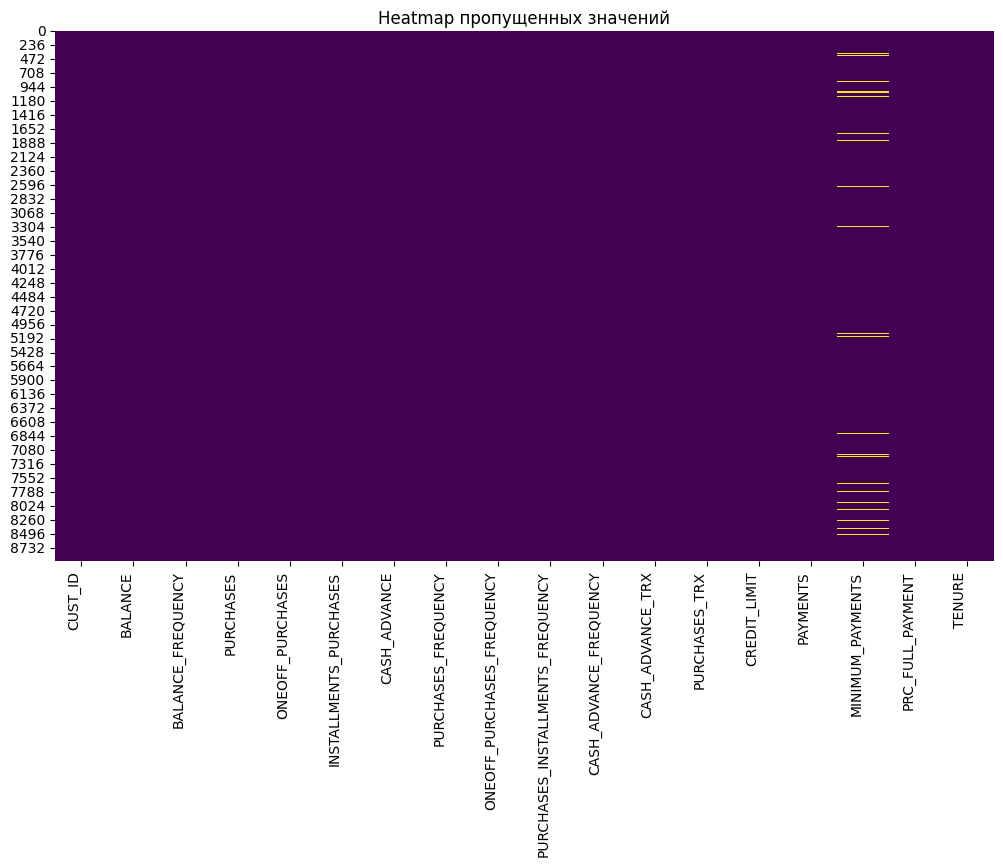

In [5]:
# Разведочный анализ данных EDA (Exploratory Data Analysis)
# Первичный анализ данных
if df is not None:
    # Первые 5 строк DataFrame:
    df_head_5(df)

    # Форма DataFrame:
    df_shape(df)
    
    # Описывает типы данных и значения колонок DataFrame.
    describe_dataframe_columns(df)    
    
    # Проверка на дубликаты:
    check_duplicates(df)
    
    # Проверка на пропущенные значения:
    check_missing_values(df)
    
    #Визуализирует пропущенные значения в DataFrame с помощью тепловой карты.
    visualize_missing_values(df)
else:
    print("DataFrame 'df' не определен. Пожалуйста, загрузите данные в DataFrame.")


In [6]:
'''
Общая картина: У нас есть данные о почти 9000 клиентах и 18 характеристиках, описывающих их расходы и поведение с кредитными картами.

Основные характеристики:
BALANCE: Средний остаток на счете - около 1564. У некоторых клиентов очень большие остатки (до 19000).
BALANCE_FREQUENCY: Как часто обновляется баланс. В среднем, баланс обновляется часто (около 0.88).
PURCHASES: Общая сумма покупок. В среднем, клиенты тратят около 1003, но разброс очень большой (от 0 до 49000).
ONEOFF_PURCHASES: Покупки одним платежом. Среднее около 592, что показывает, что клиенты совершают как крупные, так и мелкие покупки.
INSTALLMENTS_PURCHASES: Покупки в рассрочку. В среднем, около 411.
CASH_ADVANCE: Снятие наличных. В среднем 978. Разброс большой, значит, кто-то часто снимает, а кто-то вообще не пользуется этой функцией.
PURCHASES_FREQUENCY: Как часто совершаются покупки. В среднем около 0.49. Это значит, что покупки совершаются не очень часто.
ONEOFF_PURCHASES_FREQUENCY: Как часто совершаются покупки одним платежом. В среднем около 0.20.
PURCHASES_INSTALLMENTS_FREQUENCY: Как часто совершаются покупки в рассрочку. В среднем около 0.36.
CASH_ADVANCE_FREQUENCY: Как часто снимают наличные. В среднем около 0.13.
CASH_ADVANCE_TRX: Количество операций по снятию наличных.
PURCHASES_TRX: Количество покупок. В среднем около 14.
CREDIT_LIMIT: Кредитный лимит. В среднем около 4494.
PAYMENTS: Сумма платежей. В среднем около 1733.
MINIMUM_PAYMENTS: Минимальный платеж. В среднем около 864. Есть пропуски в данных по этой колонке.
PRC_FULL_PAYMENT: Доля платежей, покрывающих всю задолженность. В среднем около 0.15.
TENURE: Срок владения картой (в месяцах). Все клиенты, в основном, владеют картой около 12 месяцев.

Пропущенные значения: Есть пропущенные значения в колонках MINIMUM_PAYMENTS и CREDIT_LIMIT. Это нужно учитывать при дальнейшем анализе, 
возможно, их придется заполнить (например, средним значением или медианой).

Дубликаты: Дубликатов строк нет, что хорошо.
'''

'\nОбщая картина: У нас есть данные о почти 9000 клиентах и 18 характеристиках, описывающих их расходы и поведение с кредитными картами.\n\nОсновные характеристики:\nBALANCE: Средний остаток на счете - около 1564. У некоторых клиентов очень большие остатки (до 19000).\nBALANCE_FREQUENCY: Как часто обновляется баланс. В среднем, баланс обновляется часто (около 0.88).\nPURCHASES: Общая сумма покупок. В среднем, клиенты тратят около 1003, но разброс очень большой (от 0 до 49000).\nONEOFF_PURCHASES: Покупки одним платежом. Среднее около 592, что показывает, что клиенты совершают как крупные, так и мелкие покупки.\nINSTALLMENTS_PURCHASES: Покупки в рассрочку. В среднем, около 411.\nCASH_ADVANCE: Снятие наличных. В среднем 978. Разброс большой, значит, кто-то часто снимает, а кто-то вообще не пользуется этой функцией.\nPURCHASES_FREQUENCY: Как часто совершаются покупки. В среднем около 0.49. Это значит, что покупки совершаются не очень часто.\nONEOFF_PURCHASES_FREQUENCY: Как часто совершаютс

Анализ переменной MINIMUM_PAYMENTS:
count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64
В MINIMUM_PAYMENTS содержится 313 пропущенных значений (NaN/Null).
В столбце 'MINIMUM_PAYMENTS' содержится 313 пропущенных значений (NaN/Null).
Процент пропущенных значений: 3.50%


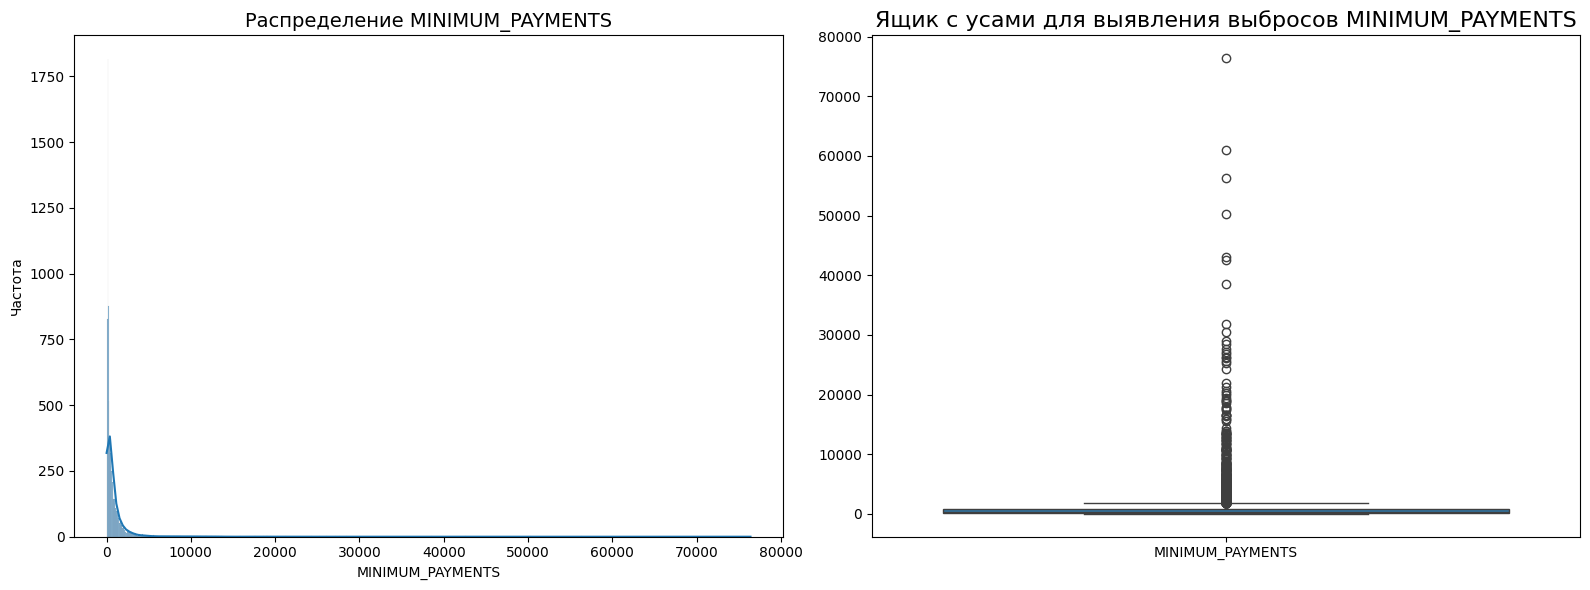

In [7]:
# анализируем колонку с MINIMUM_PAYMENTS пропущенными значениями
if df is not None:
    analyze_column(df, 'MINIMUM_PAYMENTS')

In [8]:
'''
Есть пропущенные значения в колонке MINIMUM_PAYMENTS :  3.50%
Среднее: 864.21
Медиана (50%): 312.34
Стандартное отклонение: 2372.45 (очень большое, что говорит о широком разбросе данных)
Диапазон: от 0.019 до 76406.21

Учитывая экспоненциальное распределение и наличие выборос будем заполнять пропуски медианной
'''

'\nЕсть пропущенные значения в колонке MINIMUM_PAYMENTS :  3.50%\nСреднее: 864.21\nМедиана (50%): 312.34\nСтандартное отклонение: 2372.45 (очень большое, что говорит о широком разбросе данных)\nДиапазон: от 0.019 до 76406.21\n\nУчитывая экспоненциальное распределение и наличие выборос будем заполнять пропуски медианной\n'

In [9]:
# Обработка пропущенных значений (важно перед анализом выбросов)
# Заполнение пропущенных значений
if df is not None:
    column_to_analyze = 'MINIMUM_PAYMENTS'
    fill_gap_column(df, column_to_analyze)

Заполнение пропущенных значений...
--------------------------------------------------------------------------------
Анализ пропусков перед заполнением: MINIMUM_PAYMENTS
В столбце 'MINIMUM_PAYMENTS' содержится 313 пропущенных значений (NaN/Null).
Процент пропущенных значений: 3.50%
Анализ пропусков после заполнения: MINIMUM_PAYMENTS
В столбце 'MINIMUM_PAYMENTS' нет пропущенных значений.
--------------------------------------------------------------------------------
Заполнение пропусков завершено.


In [10]:
# Обнаружение выбросов с использованием IQR в MINIMUM_PAYMENTS
if df is not None:
    column_to_analyze = 'MINIMUM_PAYMENTS'
    detect_outliers_iqr(df, column_to_analyze)

Выбросы в столбце 'MINIMUM_PAYMENTS' (IQR):
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5     C10006  1809.828751           1.000000    1333.28               0.0   
10    C10011  1293.124939           1.000000     920.12               0.0   
15    C10016  6886.213231           1.000000    1611.70               0.0   
19    C10020  3577.970933           1.000000     398.64               0.0   
20    C10021  2016.684686           1.000000     176.68               0.0   
...      ...          ...                ...        ...               ...   
8724  C18961  3002.791004           1.000000    2463.00            2463.0   
8754  C18993   455.471255           1.000000     389.70              44.7   
8840  C19081  2588.410789           0.888889     787.40               0.0   
8873  C19114  1023.883008           1.000000     585.84               0.0   
8881  C19122  2150.940844           1.000000    1105.74               0.0   

      INSTALLMENTS_PURCHASES  C

In [11]:
# Обнаружение выбросов с использованием Z-оценки
if df is not None:
    column_to_analyze = 'MINIMUM_PAYMENTS'
    detect_outliers_zscore(df, column_to_analyze)

Выбросы в столбце 'MINIMUM_PAYMENTS' (Z-оценка):
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
19    C10020  3577.970933           1.000000     398.64              0.00   
20    C10021  2016.684686           1.000000     176.68              0.00   
34    C10035  3517.101616           0.727273     547.28              0.00   
78    C10082  1205.716678           1.000000       0.00              0.00   
90    C10095  9381.255094           1.000000    5100.07           1147.83   
...      ...          ...                ...        ...               ...   
8274  C18495  1410.909779           1.000000     698.88              0.00   
8470  C18700  2046.727519           0.818182    1369.72            422.44   
8614  C18848  1182.080141           1.000000     266.68              0.00   
8688  C18925  2898.484109           1.000000       0.00              0.00   
8724  C18961  3002.791004           1.000000    2463.00           2463.00   

      INSTALLMENTS_PURCHAS

In [12]:
# удаление 909 выбросов (IQR) кажется слишком радикальным.
# выбросы не обрабатываем оставляем как есть

Анализ переменной CREDIT_LIMIT:
count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64
В CREDIT_LIMIT содержится 1 пропущенных значений (NaN/Null).
В столбце 'CREDIT_LIMIT' содержится 1 пропущенных значений (NaN/Null).
Процент пропущенных значений: 0.01%


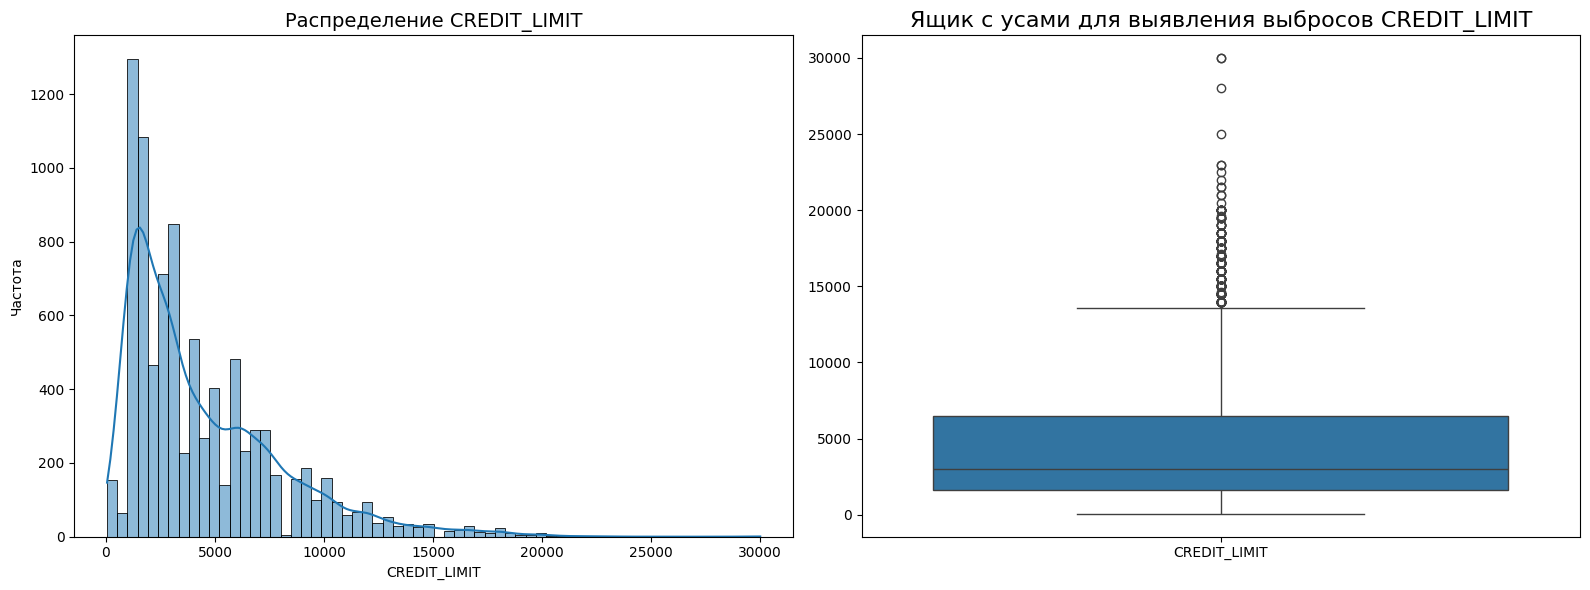

In [13]:
# пропущенные значения в CREDIT_LIMIT
if df is not None:
    analyze_column(df, 'CREDIT_LIMIT')

In [14]:
# Обработка пропущенных значений в CREDIT_LIMIT
# Заполнение пропущенных значений
if df is not None:
    column_to_analyze = 'CREDIT_LIMIT'
    fill_gap_column(df, column_to_analyze)

Заполнение пропущенных значений...
--------------------------------------------------------------------------------
Анализ пропусков перед заполнением: CREDIT_LIMIT
В столбце 'CREDIT_LIMIT' содержится 1 пропущенных значений (NaN/Null).
Процент пропущенных значений: 0.01%
Анализ пропусков после заполнения: CREDIT_LIMIT
В столбце 'CREDIT_LIMIT' нет пропущенных значений.
--------------------------------------------------------------------------------
Заполнение пропусков завершено.


In [15]:
# Обнаружение выбросов с использованием IQR в CREDIT_LIMIT
if df is not None:
    column_to_analyze = 'CREDIT_LIMIT'
    detect_outliers_iqr(df, column_to_analyze)

Выбросы в столбце 'CREDIT_LIMIT' (IQR):
     CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
85    C10089    134.917202           1.000000    1247.80           1247.80   
120   C10125   8504.876253           1.000000    6724.26           4100.08   
124   C10130  14224.115410           1.000000       0.00              0.00   
128   C10134  11167.234030           1.000000     150.64            150.64   
136   C10142   2494.868559           1.000000    5491.79           1390.50   
...      ...           ...                ...        ...               ...   
6629  C16812  16259.448570           1.000000    5024.68           3582.45   
7046  C17237   2980.054695           0.818182   26784.62          26514.32   
7764  C17975  10856.483010           1.000000      45.65             45.65   
7962  C18177  13318.659120           1.000000    3504.74           3266.29   
8229  C18450    161.926545           0.333333    1427.83           1427.83   

      INSTALLMENTS_PURC

In [16]:
# Обнаружение выбросов с использованием Z-оценки в CREDIT_LIMIT
if df is not None:
    column_to_analyze = 'CREDIT_LIMIT'
    detect_outliers_zscore(df, column_to_analyze)

Выбросы в столбце 'CREDIT_LIMIT' (Z-оценка):
     CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
85    C10089    134.917202           1.000000    1247.80           1247.80   
120   C10125   8504.876253           1.000000    6724.26           4100.08   
124   C10130  14224.115410           1.000000       0.00              0.00   
128   C10134  11167.234030           1.000000     150.64            150.64   
136   C10142   2494.868559           1.000000    5491.79           1390.50   
...      ...           ...                ...        ...               ...   
6433  C16609   6650.001408           1.000000     275.38            235.71   
6600  C16781   8465.296023           1.000000    1066.91            817.43   
6629  C16812  16259.448570           1.000000    5024.68           3582.45   
7046  C17237   2980.054695           0.818182   26784.62          26514.32   
7962  C18177  13318.659120           1.000000    3504.74           3266.29   

      INSTALLMENTS

In [17]:
# удаление 248 выбросов (IQR) кажется слишком радикальным.
# выбросы не обрабатываем оставляем как есть

In [18]:
if df is not None:
    # удаляем CUST_ID
    df = df.drop(columns=['CUST_ID'])
    df_shape(df)

Форма DataFrame:
(8950, 17)
--------------------------------------------------------------------------------


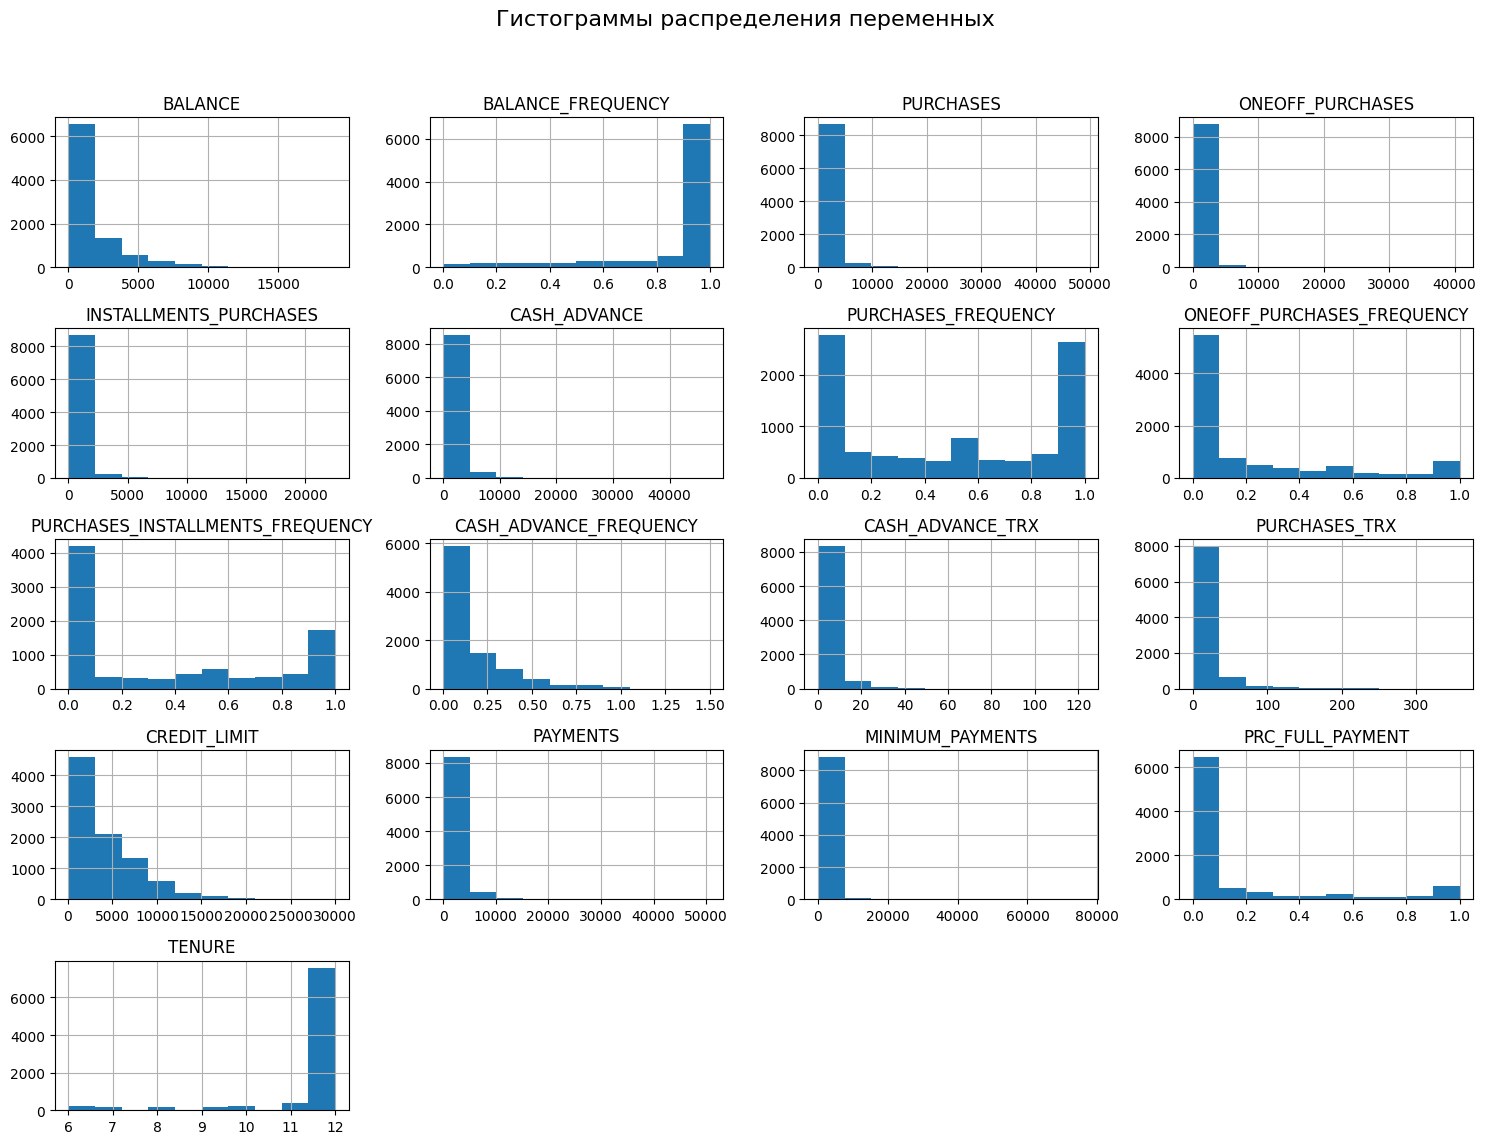

In [19]:
if df is not None:
    # Гистограммы для числовых переменных
    # Показывают распределение значений для каждой числовой переменной. Помогают увидеть, какие значения встречаются чаще всего.
    df.hist(figsize=(15, 12))
    plt.suptitle('Гистограммы распределения переменных', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

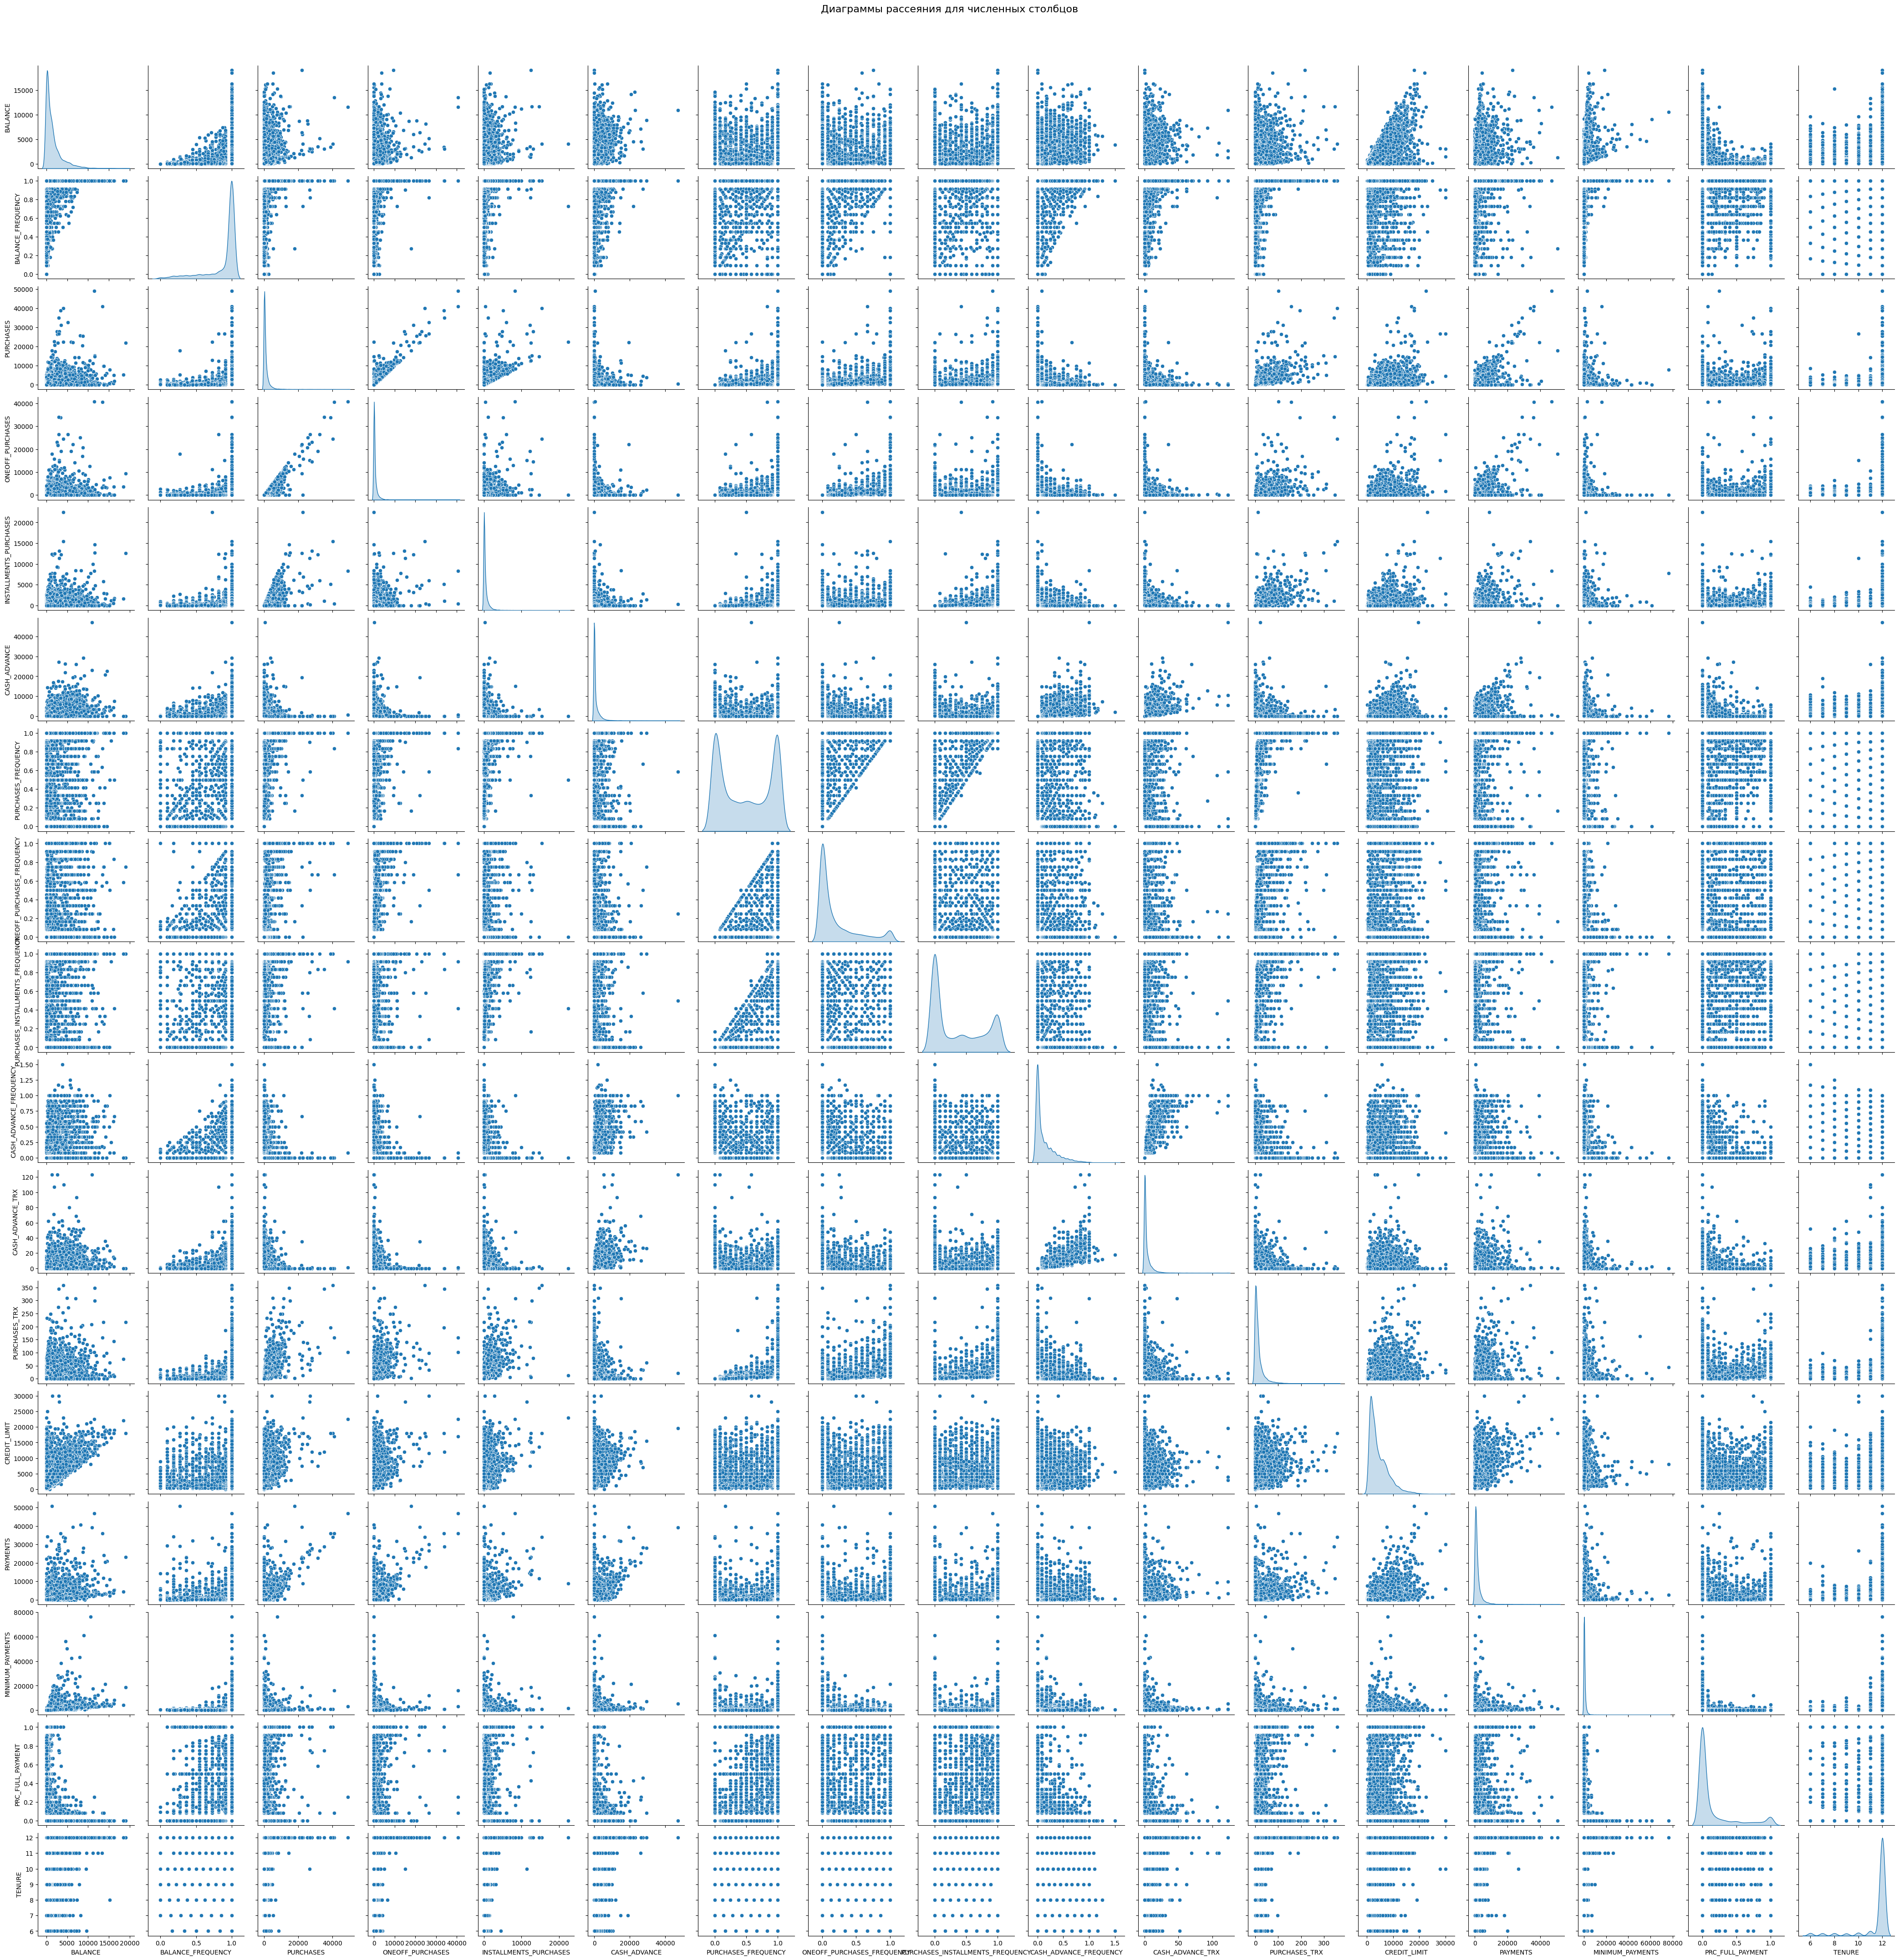

In [20]:
if df is not None:
    numeric_cols = df.select_dtypes(include=['number']).columns  # Выбираем только численные столбцы
    # Диаграммы рассеяния для выявления взаимосвязей
    # Диаграммы рассеяния: Показывают взаимосвязи между двумя переменными.
    # Если точки образуют какую-то закономерность (например, линию), это говорит о наличии связи.
    # dropna() используется, чтобы удалить строки с пропущенными значениями, иначе графики могут отображаться некорректно.
    if len(numeric_cols) >= 2:  # Нужно минимум два численных столбца
        sns.pairplot(df[numeric_cols].dropna(), diag_kind='kde') # kde - отображает плотность распределения на диагонали
        plt.suptitle('Диаграммы рассеяния для численных столбцов', fontsize=16, y=1.02) # y-position of title
        plt.show()

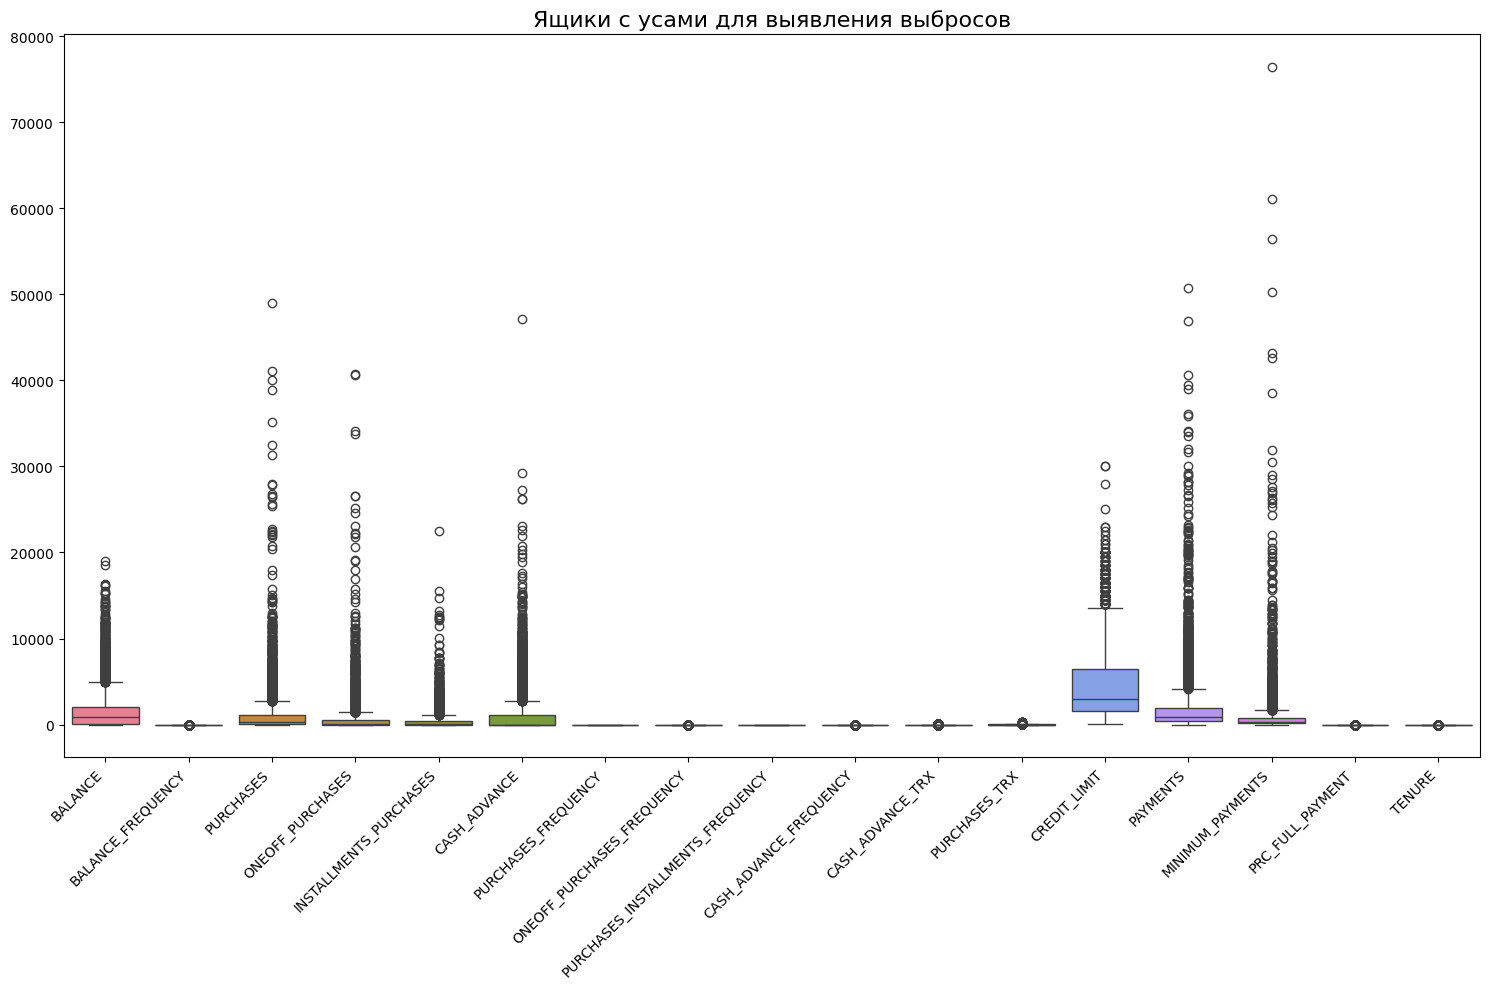

In [21]:
if df is not None:
    # Ящики с усами для выявления выбросов (для численных столбцов)
    # Показывают распределение данных, включая медиану, квартили и выбросы.
    numeric_cols = df.select_dtypes(include=['number']).columns  # Выбираем только численные столбцы
    if len(numeric_cols) > 0:  # Проверяем, что есть численные столбцы
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=df[numeric_cols])
        plt.title('Ящики с усами для выявления выбросов', fontsize=16)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

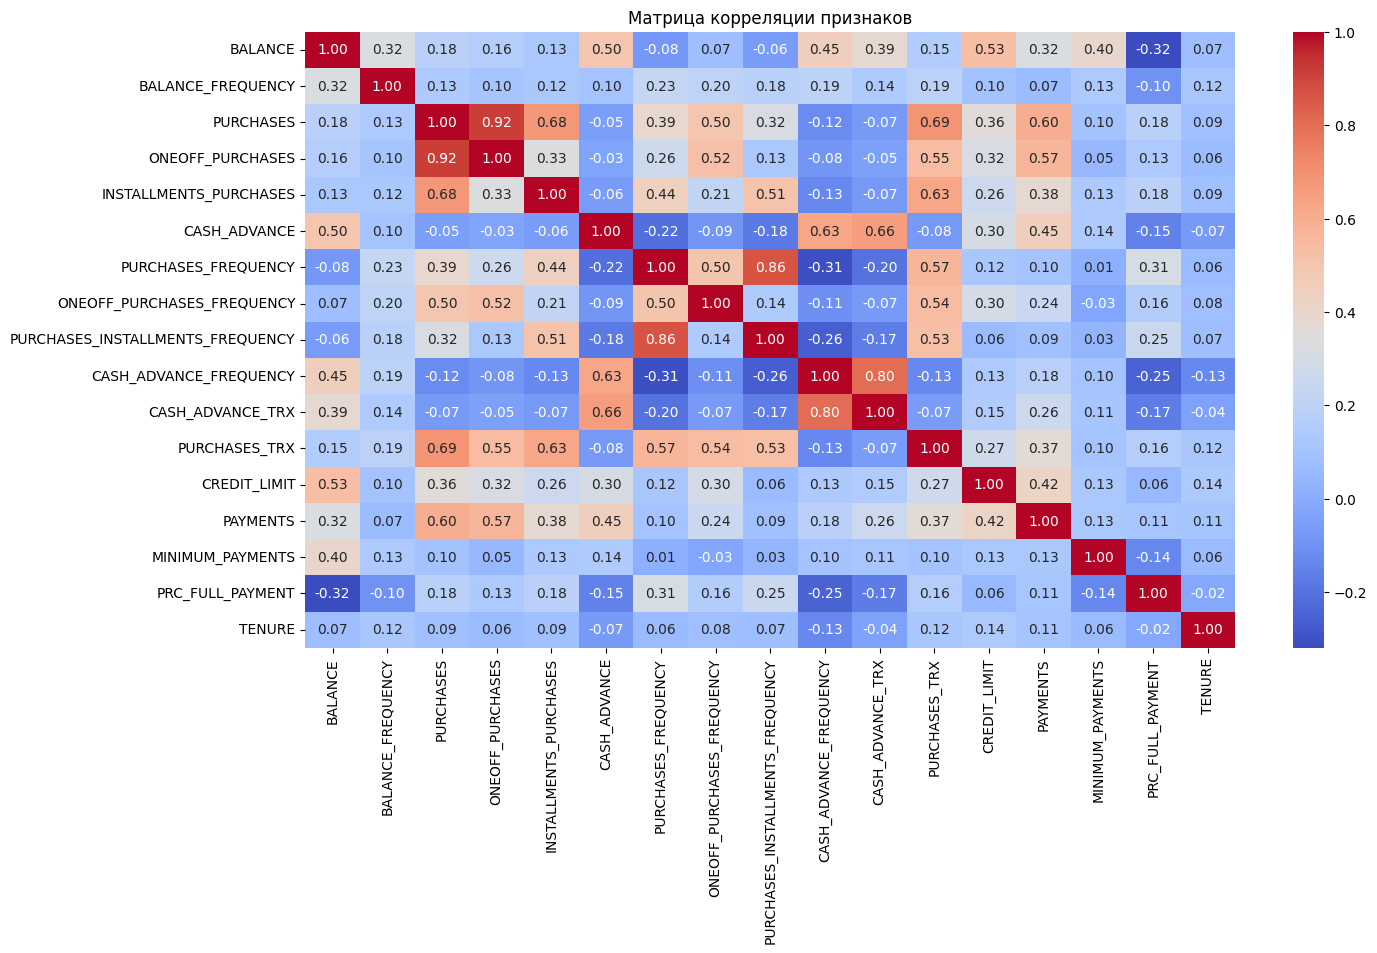

In [22]:
if df is not None:
    # Матрица корреляции
    # Показывает силу и направление линейной связи между всеми парами переменных. Значения от -1 до 1:
    # 1: Идеальная положительная корреляция (если одна переменная увеличивается, другая тоже увеличивается).
    # -1: Идеальная отрицательная корреляция (если одна переменная увеличивается, другая уменьшается).
    # 0: Отсутствие корреляции.
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Матрица корреляции признаков')
    plt.show()

In [23]:
# признак ONEOFF_PURCHASES коррелирует с PURCHASES
# признак CASH_ADVANCE_TRX коррелирует с CASH_ADVANCE_FREQUENCY
# удаляем ONEOFF_PURCHASES и CASH_ADVANCE_TRX
df = df.drop(columns=['ONEOFF_PURCHASES','CASH_ADVANCE_TRX'], axis=1)
df_shape(df)

Форма DataFrame:
(8950, 15)
--------------------------------------------------------------------------------


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [25]:
print(tf.__version__)

2.19.0


In [26]:
# Обучаем автоэнкодер сжимать информацию из 15 признаков в 3 новых признака.

# 1. Подготовка данных 
X = df.values  # Вытаскиваем значения из DataFrame

# Разделяем на обучающую и тестовую выборки
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Масштабируем данные  для лучшего обучения нейронной сети
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2. Создаем и обучаем автоэнкодер.
# Параметры автоэнкодера
input_dim = X_train_scaled.shape[1]  # Должен быть равен 15
encoding_dim = 3  # Мы хотим извлечь 3 признака

# Создаем автоэнкодер
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

# Создаем модель
autoencoder = Model(inputs=input_layer, outputs=decoder)
# Используем Adam с небольшим learning rate
# optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем автоэнкодер
# Обучаем модель с использованием среднеквадратичной ошибки в качестве функции потер
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_scaled, X_test_scaled), verbose=0)


# 3. Извлекаем признаки из тестовой выборки с помощью кодировщика.
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Извлекаем 3 признака
X_encoded = encoder_model.predict(X_test_scaled)


# 4. Сохраняем извлеченные признаки
features_df = pd.DataFrame(X_encoded, columns=['feature_1', 'feature_2', 'feature_3'])

# Теперь features_df содержит новые извлеченные признаки
print(features_df.head())

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   feature_1  feature_2  feature_3
0   5.106962   6.762256   0.000000
1   6.725376   4.420148   4.339050
2   4.759081   5.906838   8.123115
3   2.158917   3.009688   3.972059
4   4.006717   3.124689  11.255916


Первые 5 строк DataFrame:
   feature_1  feature_2  feature_3
0   5.106962   6.762256   0.000000
1   6.725376   4.420148   4.339050
2   4.759081   5.906838   8.123115
3   2.158917   3.009688   3.972059
4   4.006717   3.124689  11.255916
--------------------------------------------------------------------------------
Форма DataFrame:
(1790, 3)
--------------------------------------------------------------------------------
Типы данных колонок:
feature_1    float32
feature_2    float32
feature_3    float32
dtype: object
------------------------------
Описание значений колонок:
Колонка: feature_1
count    1790.000000
mean        4.300406
std         3.096166
min         0.000000
25%         2.269718
50%         3.996010
75%         5.765630
max        21.930273
Name: feature_1, dtype: float64
---------------
Колонка: feature_2
count    1790.000000
mean        4.379416
std         2.466978
min         0.000000
25%         2.744716
50%         3.889622
75%         6.011620
max        13.5151

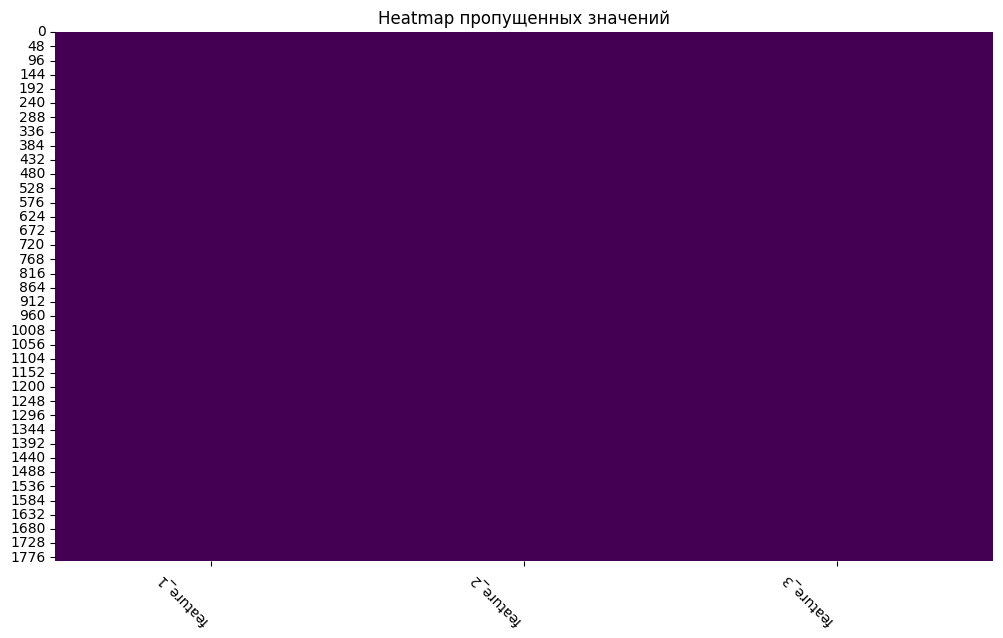

In [27]:
# Разведочный анализ данных features_df EDA (Exploratory Data Analysis)
# Первичный анализ данных
if features_df is not None:
    # Первые 5 строк DataFrame:
    df_head_5(features_df)

    # Форма DataFrame:
    df_shape(features_df)
    
    # Описывает типы данных и значения колонок DataFrame.
    describe_dataframe_columns(features_df)    
    
    # Проверка на дубликаты:
    check_duplicates(features_df)
    
    # Проверка на пропущенные значения:
    check_missing_values(features_df)
    
    #Визуализирует пропущенные значения в DataFrame с помощью тепловой карты.
    visualize_missing_values(features_df)
else:
    print("DataFrame 'features_df' не определен. Пожалуйста, загрузите данные в DataFrame.")

In [28]:
# в эту таблицу будем добавлять лучшие метрики у каждого кластеризатора
table_data_best_metric = {}

In [29]:
def print_table_data_best_metric():
    if not table_data_best_metric:
        print("Нет данных для отображения.")
        return
   
       
    # Определяем ширину столбцов
    method_width = max(len(method) for method in table_data_best_metric) + 2  # +2 для отступов
    metric_width = 15  # Фиксированная ширина для метрик
    value_width = 10   # Фиксированная ширина для значений

    def print_splitter_table():
        total_width = method_width + 1 + 3 * (metric_width + value_width + 1)
        print("-" * total_width)

    def print_column_value(dataArray, is_selected=False):
        column_value = f'({dataArray[0]}, {dataArray[1]:.4f})'
        if (is_selected):
            column_value += f'<-best'
        print(f'{column_value:<{metric_width + value_width}}|', end=" ")

    # Заголовок таблицы
    print_splitter_table()
    print(f"| {'Метод':<{method_width}}| {'Silhouette (n, value)':<{metric_width + value_width}}| {'Davies-Bouldin (n, value)':<{metric_width + value_width}}| {'Calinski-Harabasz (n, value)':<{metric_width + value_width}}|")
    print_splitter_table()

    best_method_silhouette, best_n_clusters_silhouette, best_value_silhouette = find_best_method('silhouette', 'max')
    best_method_davies_bouldin, best_n_clusters_davies_bouldin, best_value_davies_bouldin = find_best_method('davies_bouldin', 'min')
    best_method_calinski_harabasz, best_n_clusters_calinski_harabasz, best_value_calinski_harabasz = find_best_method('calinski_harabasz', 'max')

    # Данные таблицы
    for method, metrics in table_data_best_metric.items():
        print(f"| {method:<{method_width}}|", end=" ")
        is_best_silhouette_method = (method == best_method_silhouette)
        print_column_value(metrics['silhouette'], is_best_silhouette_method)

        is_best_davies_bouldin_method = (method == best_method_davies_bouldin)
        print_column_value(metrics['davies_bouldin'], is_best_davies_bouldin_method)

        is_best_calinski_harabasz_method = (method == best_method_calinski_harabasz)
        print_column_value(metrics['calinski_harabasz'], is_best_calinski_harabasz_method)
        print()
    print_splitter()

def find_best_method(metric_name, direction, print_result = False):
    best_method = None
    best_n_clusters = None
    best_value = float('-inf') if direction == 'max' else float('inf')
    for method_name, metrics in table_data_best_metric.items():
            value = metrics[metric_name][1]
            if (direction == 'max' and value > best_value) or (direction == 'min' and value < best_value):
                best_value = value
                best_n_clusters = metrics[metric_name][0]
                best_method = method_name
    if print_result:
        print(f"Лучшая {metric_name} метрика ({direction}):")
        if best_method:
            print(f"  Метод: {best_method}")
            print(f"  Количество кластеров: {best_n_clusters}")
            print(f"  Значение: {best_value:.2f}")
        else:
            print("  Нет данных.")
    return best_method, best_n_clusters, best_value

def analyze_table_data_best_metric():
    # Анализируем и выводим общую информацию о наилучших значениях метрик по всем методам.
    if not table_data_best_metric:
        print("Нет данных для анализа.")
        return
    print("Анализ лучших метрик по всем методам:")

    # Для каждой метрики находим лучший результат среди всех методов
    metrics_to_analyze = [('silhouette', 'max'), ('davies_bouldin', 'min'), ('calinski_harabasz', 'max')]
    for metric_name, direction in metrics_to_analyze:
        find_best_method(metric_name, direction, True)
       

In [30]:
def add_best_metrics(methodName: str,
                     best_n_clusters_silhouette: int,
                     best_value_silhouette: float,
                     best_n_clusters_davies_bouldin: int,
                     best_value_davies_bouldin: float,
                     best_n_clusters_calinski_harabasz: int,
                     best_value_calinski_harabasz: float):
    if methodName:
        # Сохраняем лучшие метрики для текущего метода
        table_data_best_metric[methodName] = {
            'silhouette': (best_n_clusters_silhouette, best_value_silhouette),
            'davies_bouldin': (best_n_clusters_davies_bouldin, best_value_davies_bouldin),
            'calinski_harabasz': (best_n_clusters_calinski_harabasz, best_value_calinski_harabasz),
        }

def analyze_metrics(results, methodName:str = None, print_metrics=False, print_table_best_metric=True):
    # --- Анализ результатов и выбор оптимального количества кластеров ---
    # Анализ результатов:
    # 1.  Силуэтная оценка:  Ищем максимальное значение.  Высокая силуэтная оценка указывает на хорошее разделение кластеров.
    # 2.  Индекс Дэвиса-Болдина:  Ищем минимальное значение.  Низкий индекс Дэвиса-Болдина указывает на хорошее разделение кластеров.
    # 3.  Индекс Калински-Харабаса: Ищем максимальное значение. Высокий индекс Калински-Харабаса указывает на хорошее разделение кластеров.

    has_inertia = has_key(results,'inertia')
    if (print_metrics == True):
        print("Метрики:")
        # Создаем список для данных таблицы
        table_data = []
        for n_clusters, metrics in results.items():
            row = {
                "Количество кластеров": n_clusters,
                "Силуэтная оценка": f"{metrics['silhouette']:.2f}",
                "Индекс Дэвиса-Болдуина": f"{metrics['davies_bouldin']:.2f}",
                "Индекс Калински-Харабаса": f"{metrics['calinski_harabasz']:.2f}",
            }
            if has_inertia:
                row["Инерция"] = f"{metrics['inertia']:.2f}"
            table_data.append(row)
        
        # Выводим таблицу с метриками
        df = pd.DataFrame(table_data)
        print(df.to_string(index=False))  # Используем to_string для более красивого вывода
        
    print("Анализ результатов:")
    
    # 1. Силуэтная оценка
    best_n_clusters_silhouette, best_value_silhouette = _find_best_n_clusters(results, 'silhouette', 'max')
    print(f"Рекомендованное количество кластеров (по силуэтной оценке): {best_n_clusters_silhouette}. Max: {best_value_silhouette:.2f}")
    
    # 2. Индекс Дэвиса-Болдина
    best_n_clusters_davies_bouldin, best_value_davies_bouldin = _find_best_n_clusters(results, 'davies_bouldin', 'min')
    print(f"Рекомендованное количество кластеров (по индексу Дэвиса-Болдина): {best_n_clusters_davies_bouldin}. Min: {best_value_davies_bouldin:.2f}")
    
    # 3. Индекс Калински-Харабаса
    best_n_clusters_calinski_harabasz, best_value_calinski_harabasz = _find_best_n_clusters(results, 'calinski_harabasz', 'max')
    print(f"Рекомендованное количество кластеров (по индексу Калински-Харабаса): {best_n_clusters_calinski_harabasz}. Max: {best_value_calinski_harabasz:.2f}")
    
    add_best_metrics(
        methodName,
        
        best_n_clusters_silhouette,
        best_value_silhouette,
        
        best_n_clusters_davies_bouldin,
        best_value_davies_bouldin,
        
        best_n_clusters_calinski_harabasz,
        best_value_calinski_harabasz
    )

    if print_table_best_metric:
        print_table_data_best_metric()
    # Возвращаем лучшее значение по силуэтной оценке как наиболее распространенной.
    return best_n_clusters_silhouette, best_n_clusters_davies_bouldin, best_n_clusters_calinski_harabasz


def _find_best_n_clusters(results, metric_name: str, direction: str):
    """
    Находит оптимальное количество кластеров на основе заданной метрики.

    Args:
        results:  Словарь с результатами.
        metric_name: Название метрики (например, 'silhouette').
        direction: 'max' для поиска максимума, 'min' для поиска минимума.

    Returns:
        Оптимальное количество кластеров (int), или None.
    """

    best_n_clusters = None
    best_value = float('-inf') if direction == 'max' else float('inf')  # Инициализация в зависимости от направления

    for n_clusters, metrics in results.items():
        if metric_name in metrics:
            value = metrics[metric_name]
            if (direction == 'max' and value > best_value) or (direction == 'min' and value < best_value):
                best_value = value
                best_n_clusters = n_clusters

    return best_n_clusters, best_value

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Функция для снижения размерности с помощью PCA
def reduce_dimensions(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

def get_X_scaled(X_encoded):
    features_df = pd.DataFrame(X_encoded, columns=['feature_1', 'feature_2', 'feature_3'])
    # Масштабирование данных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_df.values)
    return X_scaled

def print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, inertia):
    if n_clusters is not None:
        print(f"Количество кластеров: {n_clusters}")
    if silhouette_avg is not None:
        print(f"Силуэтная оценка: {silhouette_avg:.2f}")
    if davies_bouldin is not None:
        print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
    if calinski_harabasz is not None:
        print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")
    if inertia is not None:
        print(f"Инерция: {inertia:.2f}")
    print_splitter()

# Функция для визуализации кластеров
def visualize_clusters(X_pca, labels, title="Агломеративная кластеризация"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(title)
    plt.xlabel("Первая главная компонента")
    plt.ylabel("Вторая главная компонента")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

def visualize_clusters_with_centers(X_pca, predicted_labels, cluster_centers_pca, title="Mean Shift Clustering"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='viridis', marker='o', s=70, alpha=0.7, label='Объекты')
    plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', s=250, label='Центры кластеров')
    plt.title(title)
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.legend(fontsize='large')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.colorbar()
    plt.show()

def visualize_clusters_3D(data, labels,
                          title  = '3D', xlabel = 'Признак 1', ylabel = 'Признак 2', zlabel = 'Признак 3',
                            ):
    # 3D визуализация
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Отображение кластеров
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=50, cmap='viridis', marker='o', alpha=0.7, label='Объекты')

    # Подписи осей и заголовок
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax)  # Добавить цветовую шкалу
    plt.tight_layout()
    plt.legend()  # Показать легенду для центроидов
    plt.show()

def visualize_clusters_with_centers_3D(X, labels, centers,
                                       title  = '3D', xlabel = 'Признак 1', ylabel = 'Признак 2', zlabel = 'Признак 3',
                                       ):
    # 3D визуализация
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Отображение кластеров
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50, cmap='viridis', marker='o', alpha=0.7, label='Объекты')

    # Отображение центроидов
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=250, marker='X', label='Центры кластеров')

    # Подписи осей и заголовок
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax)  # Добавить цветовую шкалу
    plt.tight_layout()
    plt.legend()  # Показать легенду для центроидов
    plt.show()

    

def add_plot(data, key, ylabel, xlabel='Количество кластеров', title=None):
    if title is None:
        title = f'{ylabel} для n-кластеров'

    # Проверяем, что ключ существует во всех значениях data
    if not all(key in v for v in data.values()):
        # print(f"Предупреждение: Ключ '{key}' отсутствует в некоторых значениях. График не построен.")
        return None
    plt.plot(data.keys(), [v[key] for v in data.values()], marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)




def has_key(data, key):
    if not all(key in v for v in data.values()):
        return False
    return True
    

    
def visualize_metrics(results):
    plt.figure(figsize=(10, 6))
    
    # Силуэтная оценка
    plt.subplot(2, 2, 1)
    add_plot(results, 'silhouette', 'Силуэтная оценка')
    
    # Индекс Дэвиса-Болдуина
    plt.subplot(2, 2, 2)
    add_plot(results, 'davies_bouldin', 'Индекс Дэвиса-Болдуина')
   
    # Индекс Калински-Харабаса
    plt.subplot(2, 2, 3)
    add_plot(results, 'calinski_harabasz', 'Индекс Калински-Харабаса')

    # Inertia
    key = 'inertia'
    if has_key(results, key):
        plt.subplot(2, 2, 4)
        add_plot(results, key, 'Инерция')
    
    plt.tight_layout()
    plt.show()
    #analyze_metrics(results)

# Функция для вычисления метрик качества
def calculate_quality_metrics(X_scaled, labels):
    if len(np.unique(labels)) < 2:
        return None, None, None
    else:
        silhouette_avg = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
        return silhouette_avg, davies_bouldin, calinski_harabasz

def calculate_kmeans(X, n_clusters, random_state=42, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=n_init)
    labels = kmeans.fit_predict(X)
    inertia = kmeans.inertia_
    return kmeans, labels, inertia    

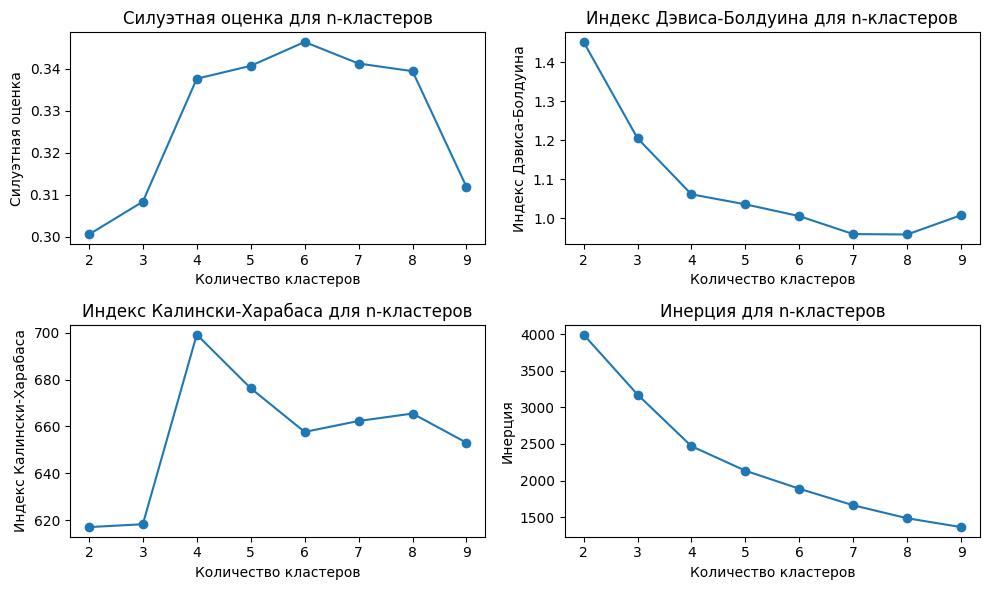

Метрики:
 Количество кластеров Силуэтная оценка Индекс Дэвиса-Болдуина Индекс Калински-Харабаса Инерция
                    2             0.30                   1.45                   617.00 3992.34
                    3             0.31                   1.20                   618.22 3173.93
                    4             0.34                   1.06                   699.28 2469.42
                    5             0.34                   1.04                   676.35 2134.65
                    6             0.35                   1.00                   657.68 1888.67
                    7             0.34                   0.96                   662.35 1663.11
                    8             0.34                   0.96                   665.52 1485.78
                    9             0.31                   1.01                   653.07 1365.19
Анализ результатов:
Рекомендованное количество кластеров (по силуэтной оценке): 6. Max: 0.35
Рекомендованное количество кластеров (по ин

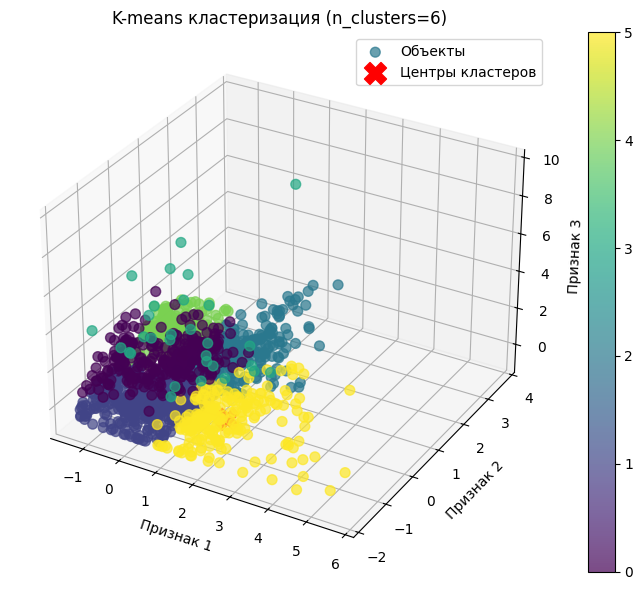

Количество кластеров: 6
Силуэтная оценка: 0.35
Индекс Дэвиса-Болдуина: 1.00
Индекс Калински-Харабаса: 657.68
Инерция: 1888.67
--------------------------------------------------------------------------------


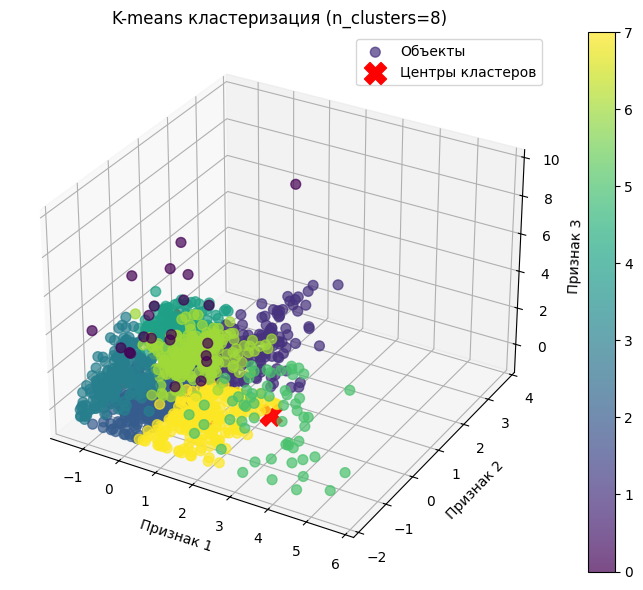

Количество кластеров: 8
Силуэтная оценка: 0.34
Индекс Дэвиса-Болдуина: 0.96
Индекс Калински-Харабаса: 665.52
Инерция: 1485.78
--------------------------------------------------------------------------------


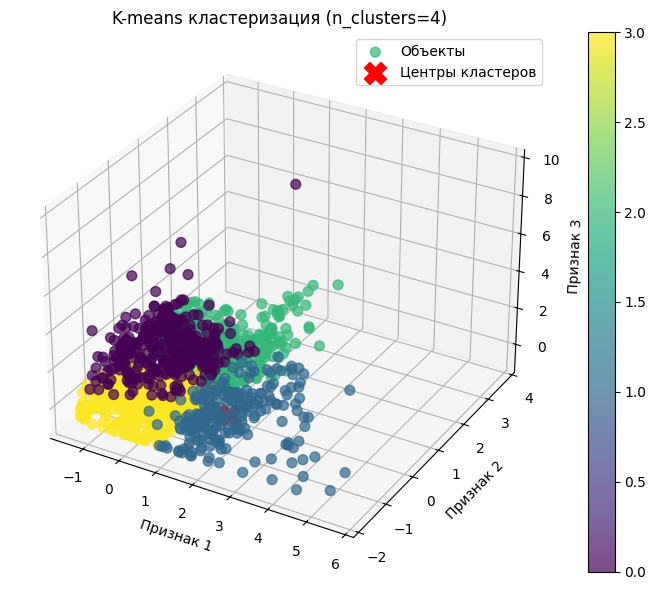

Количество кластеров: 4
Силуэтная оценка: 0.34
Индекс Дэвиса-Болдуина: 1.06
Индекс Калински-Харабаса: 699.28
Инерция: 2469.42
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| Метод      | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
------------------------------------------------------------------------------------------
| K-Means 3  | (6, 0.3464)<-best        | (8, 0.9579)<-best        | (4, 699.2771)<-best      | 
--------------------------------------------------------------------------------


In [32]:
#Кластеризация по методу K-Means для 3 признаков
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Функция для оценки кластеризации и визуализации
def evaluate_clustering(X, n_clusters, show_graph=False, print_score=False):
    # Вычисление метрик
    kmeans, labels, inertia = calculate_kmeans(X, n_clusters)
    silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X, labels)
    
    if show_graph:
        centers = kmeans.cluster_centers_
        title = f'K-means кластеризация (n_clusters={n_clusters})';
        visualize_clusters_with_centers_3D(X, labels, centers, title)
        
    if print_score:
        print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, inertia)

    return {
        'silhouette': silhouette_avg,
        'davies_bouldin': davies_bouldin,
        'inertia': inertia,
        'calinski_harabasz': calinski_harabasz
    }


# Основной цикл: перебор количества кластеров
results = {}
X_scaled = get_X_scaled(X_encoded)
for n_clusters in range(2, 10):
    results[n_clusters] = evaluate_clustering(X_scaled, n_clusters)

# Визуализация изменений метрик (после цикла)
visualize_metrics(results)

best_n_clusters_silhouette, best_n_clusters_davies_bouldin, best_n_clusters_calinski_harabasz = analyze_metrics(
    results, methodName='K-Means 3', print_metrics=True, print_table_best_metric=False)

silhouette = evaluate_clustering(X_scaled, best_n_clusters_silhouette, show_graph=True, print_score=True)

if (best_n_clusters_davies_bouldin != best_n_clusters_silhouette):
    davies_bouldin = evaluate_clustering(X_scaled, best_n_clusters_davies_bouldin, show_graph=True, print_score=True)

if (best_n_clusters_calinski_harabasz != best_n_clusters_davies_bouldin and best_n_clusters_calinski_harabasz != best_n_clusters_silhouette):
    calinski_harabasz = evaluate_clustering(X_scaled, best_n_clusters_calinski_harabasz, show_graph=True, print_score=True)


print_table_data_best_metric()

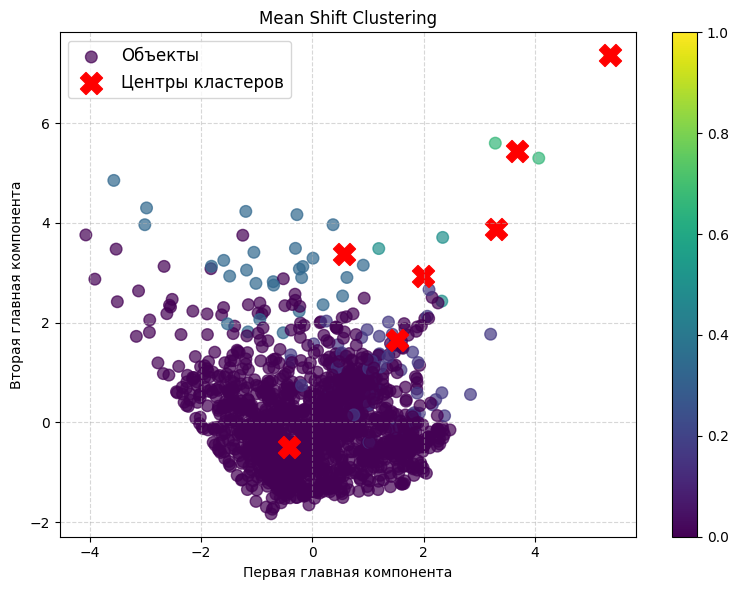

Количество кластеров: 7
Силуэтная оценка: 0.16
Индекс Дэвиса-Болдуина: 0.73
Индекс Калински-Харабаса: 65.06
--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
| Метод                  | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
------------------------------------------------------------------------------------------------------
| K-Means 3              | (6, 0.3464)<-best        | (8, 0.9579)              | (4, 699.2771)<-best      | 
| Mean Shift Clustering  | (7, 0.1633)              | (7, 0.7294)<-best        | (7, 65.0604)             | 
--------------------------------------------------------------------------------


In [33]:
# кластеризация Mean Shift Clustering
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# --- Оценка bandwidth и кластеризация Mean Shift ---
def perform_mean_shift(X_scaled, quantile=0.2, n_samples=500):
    # Оценка bandwidth
    bandwidth = estimate_bandwidth(X_scaled, quantile=quantile, n_samples=n_samples)

    # Кластеризация Mean Shift
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(X_scaled)
    predicted_labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_

    return predicted_labels, cluster_centers, bandwidth

# 1. Подготовка данных и масштабирование данных
X_scaled = get_X_scaled(X_encoded)

# 2. Кластеризация Mean Shift
predicted_labels, cluster_centers, bandwidth = perform_mean_shift(X_scaled)

# 3. Снижение размерности и визуализация
X_pca, pca = reduce_dimensions(X_scaled)
cluster_centers_pca = pca.transform(cluster_centers)
visualize_clusters_with_centers(X_pca, predicted_labels, cluster_centers_pca, 'Mean Shift Clustering')

# 4. Оценка качества кластеризации
silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X_pca, predicted_labels)

if (silhouette_avg):
    n_clusters = len(set(predicted_labels))
    # 5. Вывод оценок
    print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, None)
    
    add_best_metrics('Mean Shift Clustering',
                     n_clusters, silhouette_avg,
                     n_clusters, davies_bouldin,
                     n_clusters, calinski_harabasz )
    print_table_data_best_metric()

Количество кластеров: 62
Кластер 1 - Центр: [-0.7264181  -0.56567943 -0.7998486 ], Количество объектов: 66
Кластер 2 - Центр: [-1.284441  -0.6326562  0.3763559], Количество объектов: 32
Кластер 3 - Центр: [-1.2361563   0.92625207 -0.07679046], Количество объектов: 29
Кластер 4 - Центр: [ 0.39796042  1.8589463  -0.6764793 ], Количество объектов: 56
Кластер 5 - Центр: [ 0.4397051 -1.1958092  0.8669247], Количество объектов: 15
Кластер 6 - Центр: [-0.32762334  0.10349949 -0.6419125 ], Количество объектов: 55
Кластер 7 - Центр: [ 2.2057683  -0.3488406   0.89367396], Количество объектов: 13
Кластер 8 - Центр: [ 1.4324695  -1.4948232   0.02689521], Количество объектов: 11
Кластер 9 - Центр: [ 3.412481   -0.7580137  -0.52099025], Количество объектов: 10
Кластер 10 - Центр: [-0.5049374  -0.293094   -0.73208547], Количество объектов: 107
Кластер 11 - Центр: [0.9279319 2.717994  1.1421695], Количество объектов: 19
Кластер 12 - Центр: [1.7905983  1.1234435  0.65527344], Количество объектов: 12
Кл

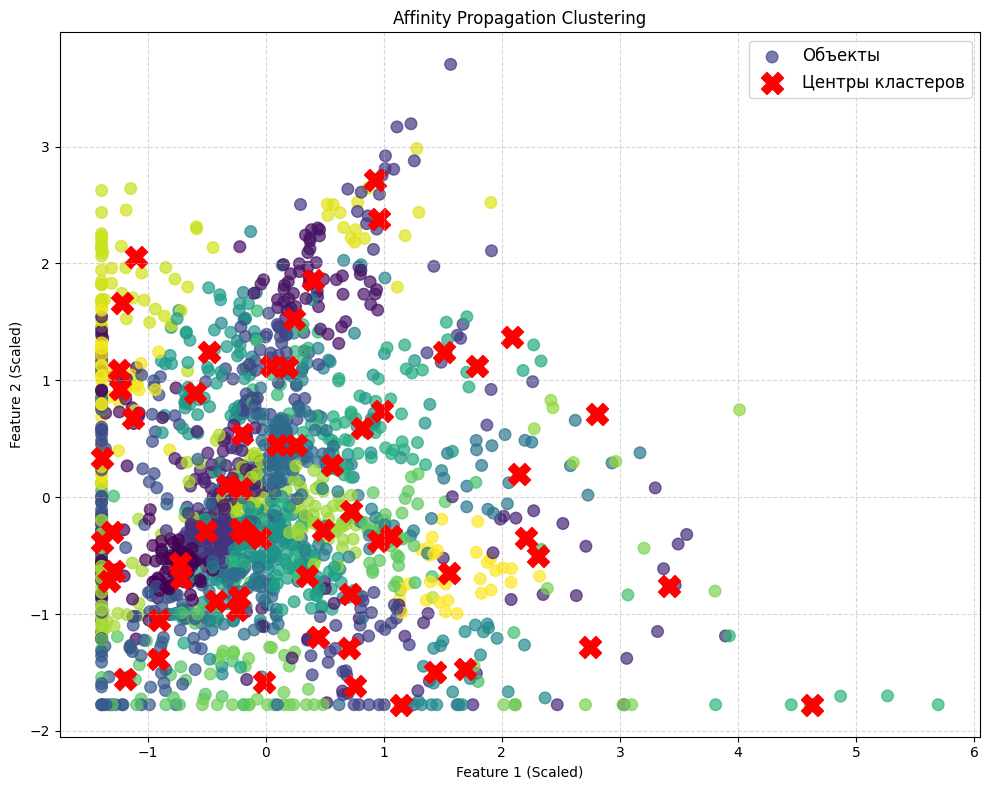

Количество кластеров: 62
Силуэтная оценка: 0.28
Индекс Дэвиса-Болдуина: 0.98
Индекс Калински-Харабаса: 485.13
--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
| Метод                            | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
----------------------------------------------------------------------------------------------------------------
| K-Means 3                        | (6, 0.3464)<-best        | (8, 0.9579)              | (4, 699.2771)<-best      | 
| Mean Shift Clustering            | (7, 0.1633)              | (7, 0.7294)<-best        | (7, 65.0604)             | 
| Affinity Propagation Clustering  | (62, 0.2753)             | (62, 0.9846)             | (62, 485.1256)           | 
--------------------------------------------------------------------------------


In [34]:
# кластеризация Affinity Propagation Clustering
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 1. Подготовка данных и масштабирование данных
X_scaled = get_X_scaled(X_encoded)


# 2. Кластеризация с использованием Affinity Propagation ---
# 2.1. Инициализация и обучение модели
af = AffinityPropagation(random_state=42)
af.fit(X_scaled)

# 2.2. Получение результатов
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)


# 3. Анализ результатов
# 3.1. Вывод информации о кластерах
print(f"Количество кластеров: {n_clusters_}")

for i in range(n_clusters_):
    cluster_center = X_scaled[cluster_centers_indices[i]]
    cluster_objects = X_scaled[labels == i]
    print(f"Кластер {i + 1} - Центр: {cluster_center}, Количество объектов: {len(cluster_objects)}")

# 3.2. Визуализация кластеров (с использованием первых двух признаков)
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', s=70, alpha=0.7, label='Объекты')
plt.scatter(X_scaled[cluster_centers_indices, 0], X_scaled[cluster_centers_indices, 1], c='red', marker='X', s=250, label='Центры кластеров')
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(fontsize='large')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 4. Вычисление метрик
silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X_scaled, labels)

# 5. Вывод оценок
print_scores(n_clusters_, silhouette_avg, davies_bouldin, calinski_harabasz, None)

add_best_metrics('Affinity Propagation Clustering',
                 n_clusters_, silhouette_avg,
                 n_clusters_, davies_bouldin,
                 n_clusters_, calinski_harabasz )
print_table_data_best_metric()

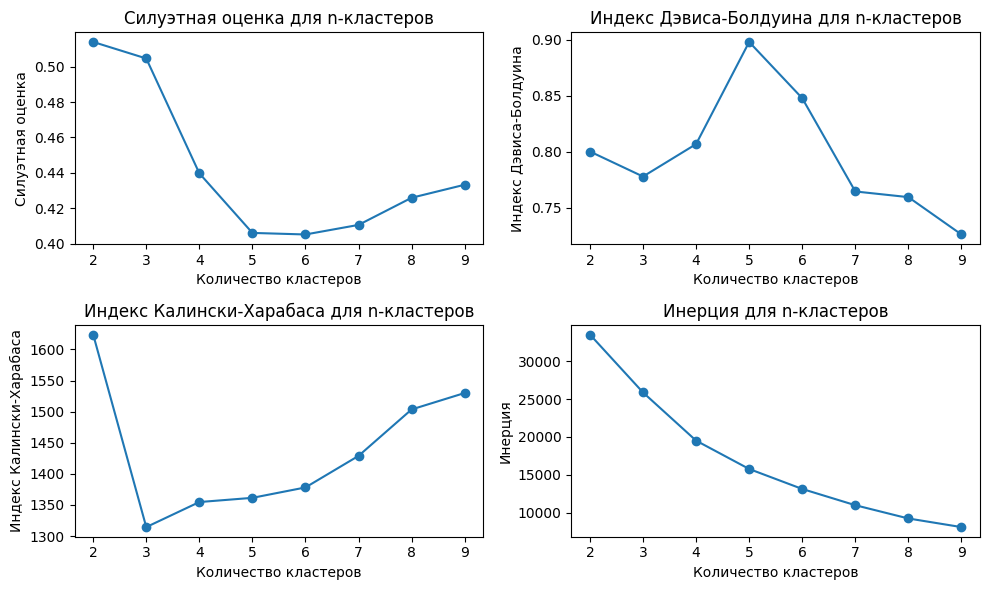

Метрики:
 Количество кластеров Силуэтная оценка Индекс Дэвиса-Болдуина Индекс Калински-Харабаса  Инерция
                    2             0.51                   0.80                  1623.97 33490.69
                    3             0.50                   0.78                  1314.39 25863.02
                    4             0.44                   0.81                  1354.67 19512.28
                    5             0.41                   0.90                  1361.43 15776.79
                    6             0.41                   0.85                  1378.16 13143.09
                    7             0.41                   0.76                  1428.90 11002.79
                    8             0.43                   0.76                  1503.57  9253.75
                    9             0.43                   0.73                  1530.01  8117.97
Анализ результатов:
Рекомендованное количество кластеров (по силуэтной оценке): 2. Max: 0.51
Рекомендованное количество кластер

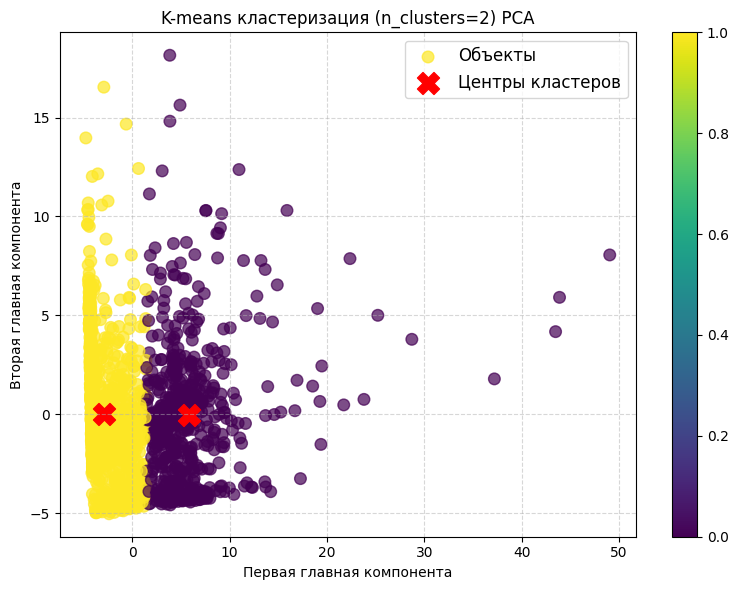

Количество кластеров: 2
Силуэтная оценка: 0.51
Индекс Дэвиса-Болдуина: 0.80
Индекс Калински-Харабаса: 1623.97
Инерция: 33490.69
--------------------------------------------------------------------------------


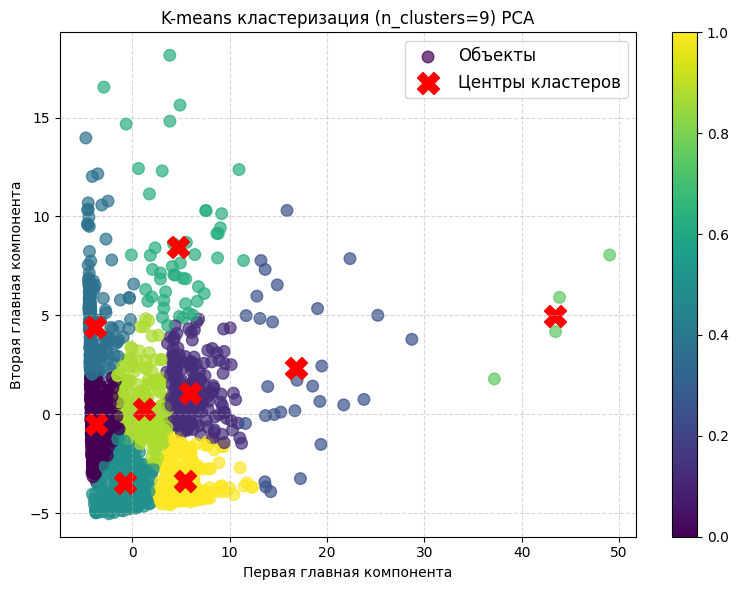

Количество кластеров: 9
Силуэтная оценка: 0.43
Индекс Дэвиса-Болдуина: 0.73
Индекс Калински-Харабаса: 1530.01
Инерция: 8117.97
--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
| Метод                            | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
----------------------------------------------------------------------------------------------------------------
| K-Means 3                        | (6, 0.3464)              | (8, 0.9579)              | (4, 699.2771)            | 
| Mean Shift Clustering            | (7, 0.1633)              | (7, 0.7294)              | (7, 65.0604)             | 
| Affinity Propagation Clustering  | (62, 0.2753)             | (62, 0.9846)             | (62, 485.1256)           | 
| K-Means 3 PCA                    | (2, 0.5140)<-best        | (9, 0.7260)<-best       

In [35]:
#Кластеризация по методу K-Means для 3 признаков c PCA

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import pandas as pd 

# Функция для оценки кластеризации и визуализации
def evaluate_clustering(X, n_clusters, show_graph=False, print_score=False):
    # Вычисление метрик
    kmeans, labels, inertia = calculate_kmeans(X, n_clusters)
    silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X, labels)

    if show_graph:
        centers = kmeans.cluster_centers_
        title = f'K-means кластеризация (n_clusters={n_clusters}) PCA';
        visualize_clusters_with_centers(X, labels, centers, title)

    if print_score:
        print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, inertia)

    return {
        'silhouette': silhouette_avg,
        'davies_bouldin': davies_bouldin,
        'inertia': inertia,
        'calinski_harabasz': calinski_harabasz
    }

# Основной цикл: перебор количества кластеров
results = {}
X_pca, pca = reduce_dimensions(features_df)
for n_clusters in range(2, 10):
    results[n_clusters] = evaluate_clustering(X_pca, n_clusters)

# Визуализация изменений метрик (после цикла)
visualize_metrics(results)

best_n_clusters_silhouette, best_n_clusters_davies_bouldin, best_n_clusters_calinski_harabasz = analyze_metrics(
    results, methodName='K-Means 3 PCA', print_metrics=True, print_table_best_metric=False)

silhouette = evaluate_clustering(X_pca, best_n_clusters_silhouette, show_graph=True, print_score=True)

if (best_n_clusters_davies_bouldin != best_n_clusters_silhouette):
    davies_bouldin = evaluate_clustering(X_pca, best_n_clusters_davies_bouldin, show_graph=True, print_score=True)

if (best_n_clusters_calinski_harabasz != best_n_clusters_davies_bouldin and best_n_clusters_calinski_harabasz != best_n_clusters_silhouette):
    calinski_harabasz = evaluate_clustering(X_pca, best_n_clusters_calinski_harabasz, show_graph=True, print_score=True)


print_table_data_best_metric()

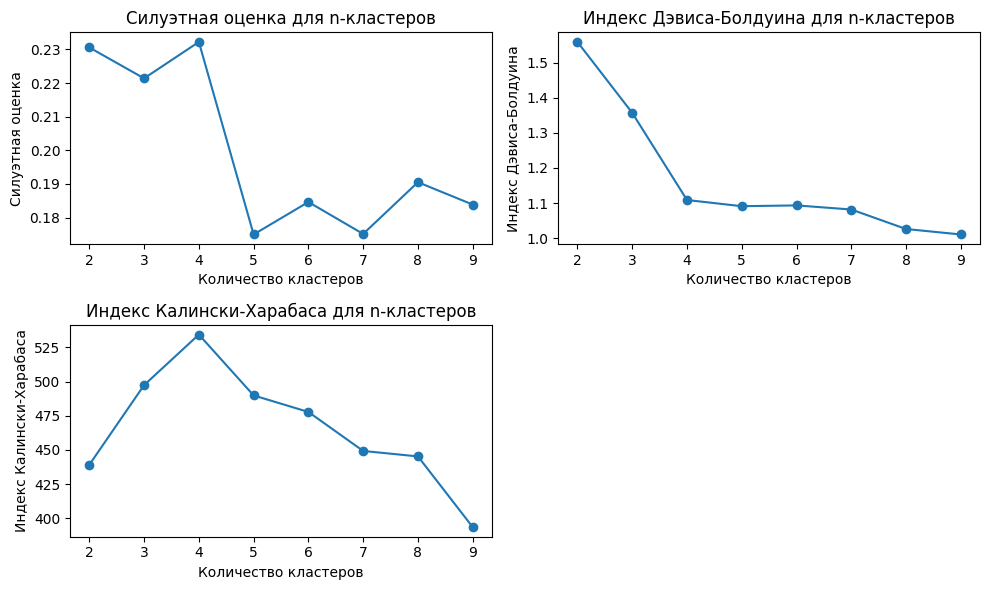

Метрики:
 Количество кластеров Силуэтная оценка Индекс Дэвиса-Болдуина Индекс Калински-Харабаса
                    2             0.23                   1.56                   439.07
                    3             0.22                   1.36                   497.35
                    4             0.23                   1.11                   534.33
                    5             0.17                   1.09                   489.82
                    6             0.18                   1.09                   477.72
                    7             0.18                   1.08                   449.20
                    8             0.19                   1.03                   445.20
                    9             0.18                   1.01                   393.49
Анализ результатов:
Рекомендованное количество кластеров (по силуэтной оценке): 4. Max: 0.23
Рекомендованное количество кластеров (по индексу Дэвиса-Болдина): 9. Min: 1.01
Рекомендованное количество кластеров

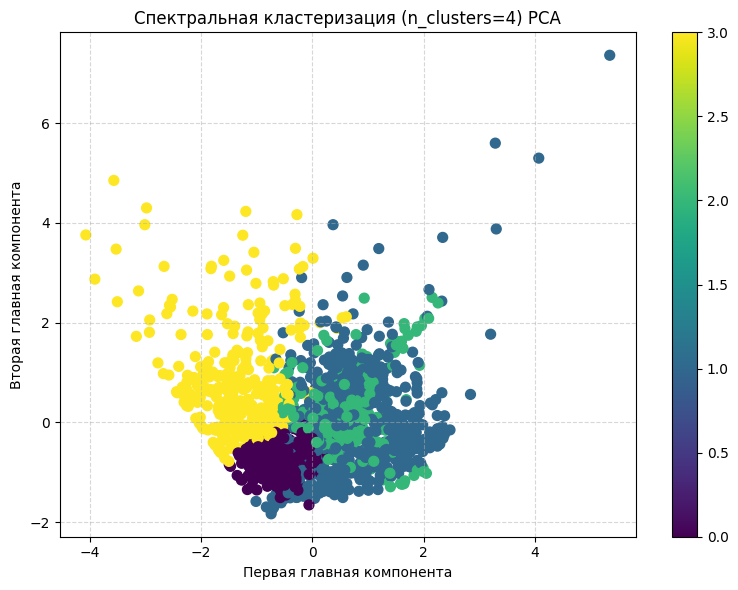

Количество кластеров: 4
Силуэтная оценка: 0.23
Индекс Дэвиса-Болдуина: 1.11
Индекс Калински-Харабаса: 534.33
--------------------------------------------------------------------------------


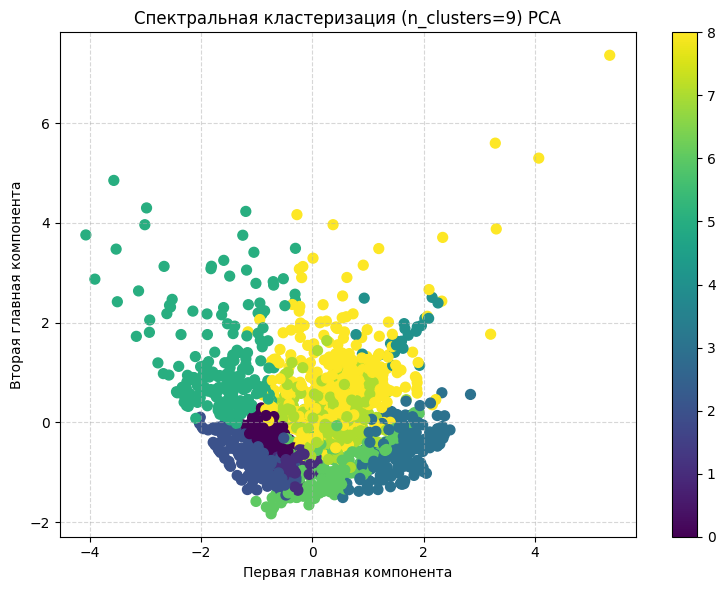

Количество кластеров: 9
Силуэтная оценка: 0.18
Индекс Дэвиса-Болдуина: 1.01
Индекс Калински-Харабаса: 393.49
--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
| Метод                            | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
----------------------------------------------------------------------------------------------------------------
| K-Means 3                        | (6, 0.3464)              | (8, 0.9579)              | (4, 699.2771)            | 
| Mean Shift Clustering            | (7, 0.1633)              | (7, 0.7294)              | (7, 65.0604)             | 
| Affinity Propagation Clustering  | (62, 0.2753)             | (62, 0.9846)             | (62, 485.1256)           | 
| K-Means 3 PCA                    | (2, 0.5140)<-best        | (9, 0.7260)<-best        | (2, 1623.9662)<

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
    
# Спектральная кластеризация и оценка
def perform_spectral_clustering(X_scaled, X_pca, n_clusters, show_graph=False, print_score=False):
    spectral = SpectralClustering(n_clusters=n_clusters,
                                    affinity='nearest_neighbors',
                                    random_state=42)
    predicted_labels = spectral.fit_predict(X_scaled)
    silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X_scaled, predicted_labels)
    
    if show_graph:
        # Визуализация
        title = f"Спектральная кластеризация (n_clusters={n_clusters}) PCA"
        visualize_clusters(X_pca, predicted_labels, title)
    
    
    if print_score:
        # Печать
        print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, None)
        
    return {
        'silhouette': silhouette_avg,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz
    }

# Подготовка данных и масштабирование данных
X_scaled = get_X_scaled(X_encoded)

# Снижение размерности для визуализации (PCA)
X_pca, pca =  reduce_dimensions(X_scaled)

results = {}
# Перебираем количество кластеров
for n_clusters in range(2, 10):
    results[n_clusters] = perform_spectral_clustering(X_scaled, X_pca, n_clusters)
    
# Визуализация изменений метрик (после цикла)
visualize_metrics(results)

best_n_clusters_silhouette, best_n_clusters_davies_bouldin, best_n_clusters_calinski_harabasz = analyze_metrics(
    results, methodName='SpectralClustering', print_metrics=True, print_table_best_metric=False)

silhouette = perform_spectral_clustering(X_scaled, X_pca, best_n_clusters_silhouette, show_graph=True, print_score=True)

if (best_n_clusters_davies_bouldin != best_n_clusters_silhouette):
    davies_bouldin = perform_spectral_clustering(X_scaled, X_pca, best_n_clusters_davies_bouldin, show_graph=True, print_score=True)

if (best_n_clusters_calinski_harabasz != best_n_clusters_davies_bouldin and best_n_clusters_calinski_harabasz != best_n_clusters_silhouette):
    calinski_harabasz = perform_spectral_clustering(X_scaled, X_pca, best_n_clusters_calinski_harabasz, show_graph=True, print_score=True)


print_table_data_best_metric()

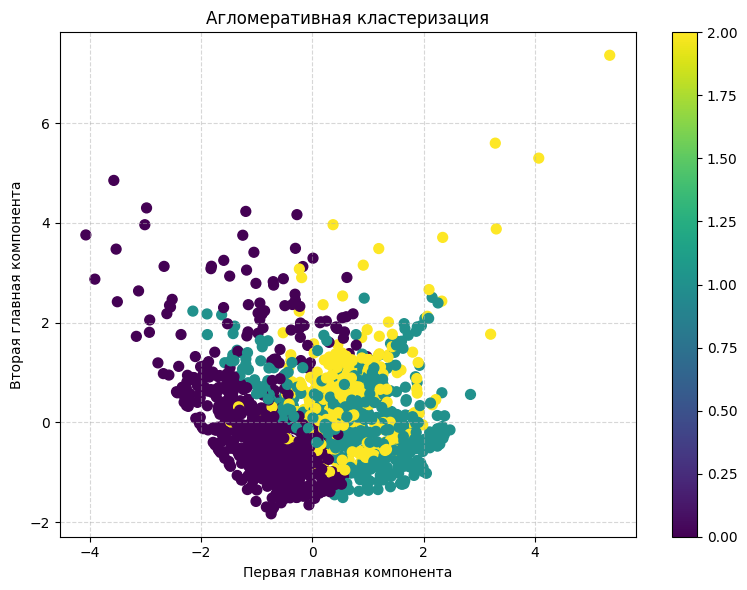

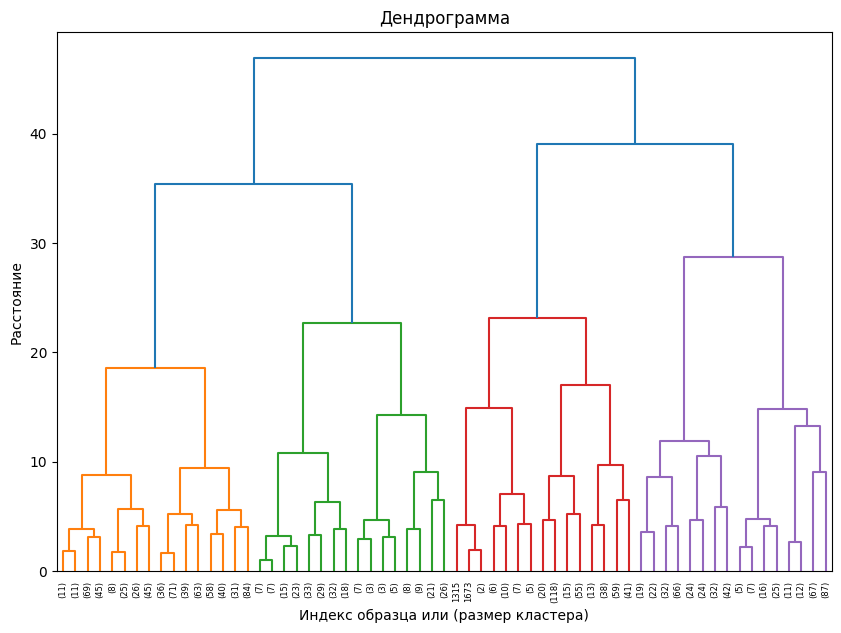

Количество кластеров: 3
Силуэтная оценка: 0.27
Индекс Дэвиса-Болдуина: 1.33
Индекс Калински-Харабаса: 474.67
--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
| Метод                            | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
----------------------------------------------------------------------------------------------------------------
| K-Means 3                        | (6, 0.3464)              | (8, 0.9579)              | (4, 699.2771)            | 
| Mean Shift Clustering            | (7, 0.1633)              | (7, 0.7294)              | (7, 65.0604)             | 
| Affinity Propagation Clustering  | (62, 0.2753)             | (62, 0.9846)             | (62, 485.1256)           | 
| K-Means 3 PCA                    | (2, 0.5140)<-best        | (9, 0.7260)<-best        | (2, 1623.9662)<

In [37]:
# Агломеративная кластеризация
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Функция для применения агломеративной кластеризации
def apply_agglomerative_clustering(X_scaled, n_clusters):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    return agg_clustering.fit_predict(X_scaled)

# Функция для визуализации дендрограммы
def plot_dendrogram(X_scaled):
    plt.figure(figsize=(10, 7))
    Z = linkage(X_scaled, method='ward')
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title('Дендрограмма')
    plt.xlabel('Индекс образца или (размер кластера)')
    plt.ylabel('Расстояние')
    plt.show()

# Подготовка данных и масштабирование данных
X_scaled = get_X_scaled(X_encoded)

# Применение агломеративной кластеризации
n_clusters = 3  # Устанавливаем количество кластеров
predicted_labels = apply_agglomerative_clustering(X_scaled, n_clusters)

# Снижение размерности с использованием PCA для визуализации
X_pca, pca = reduce_dimensions(X_scaled)

# Визуализация кластеров после агломеративной кластеризации
visualize_clusters(X_pca, predicted_labels)

# Визуализация дендрограммы
plot_dendrogram(X_scaled)

# Вычисление и вывод метрик качества
silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X_scaled, predicted_labels)
print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, None)

add_best_metrics('AgglomerativeClustering',
                 n_clusters, silhouette_avg,
                 n_clusters, davies_bouldin,
                 n_clusters, calinski_harabasz )
print_table_data_best_metric()


Найдено кластеров: 1
Количество шумовых точек: 233
Метки кластеров: [-1  0]


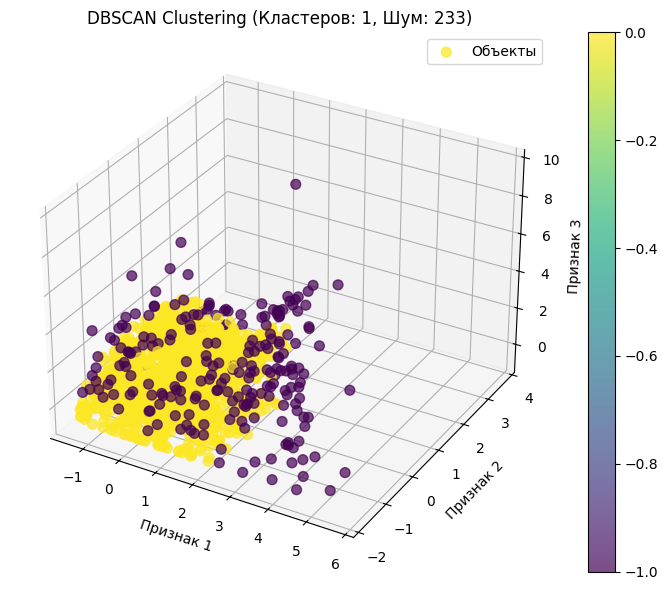

Кластеров без шума не найдено


In [38]:
# DBSCAN Clustering
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV, cross_val_score  # Добавлено для подбора параметров и валидации
from sklearn.metrics import make_scorer  # Импортируем make_scorer

def apply_dbscan(data, eps=0.5, min_samples=15):
    """Применяет алгоритм DBSCAN к данным."""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    return dbscan.fit_predict(data)

def analyze_results(labels):
    """Анализирует результаты кластеризации."""
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = np.sum(labels == -1)
    return n_clusters, n_noise, unique_labels

def calculate_quality_metrics_DBSCAN(data, labels):
    """Вычисляет метрики качества кластеризации."""
    mask = labels != -1  # Исключаем шум
    clustered_labels = labels[mask]
    clustered_data = data[mask]
    if len(np.unique(clustered_labels)) < 2:  # Проверяем количество кластеров
        return None, None, None

    if len(clustered_labels) < 2:
        return None, None, None

    silhouette, davies_bouldin, calinski_harabasz = calculate_quality_metrics(clustered_data, clustered_labels) 
    return silhouette, davies_bouldin, calinski_harabasz


X_scaled = get_X_scaled(X_encoded)
predicted_labels = apply_dbscan(X_scaled)
n_clusters, n_noise, unique_labels = analyze_results(predicted_labels)


print(f"Найдено кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")
print(f"Метки кластеров: {unique_labels}")

title = f"DBSCAN Clustering (Кластеров: {n_clusters}, Шум: {n_noise})"
visualize_clusters_3D(X_scaled, predicted_labels, title)

silhouette, davies_bouldin, calinski_harabasz = calculate_quality_metrics_DBSCAN(X_scaled, predicted_labels)
if silhouette:
    print_scores(n_clusters, silhouette, davies_bouldin, calinski_harabasz, None)
    add_best_metrics('DBSCAN',
                 n_clusters, silhouette_avg,
                 n_clusters, davies_bouldin,
                 n_clusters, calinski_harabasz )
    print_table_data_best_metric()
else:
    print('Кластеров без шума не найдено')

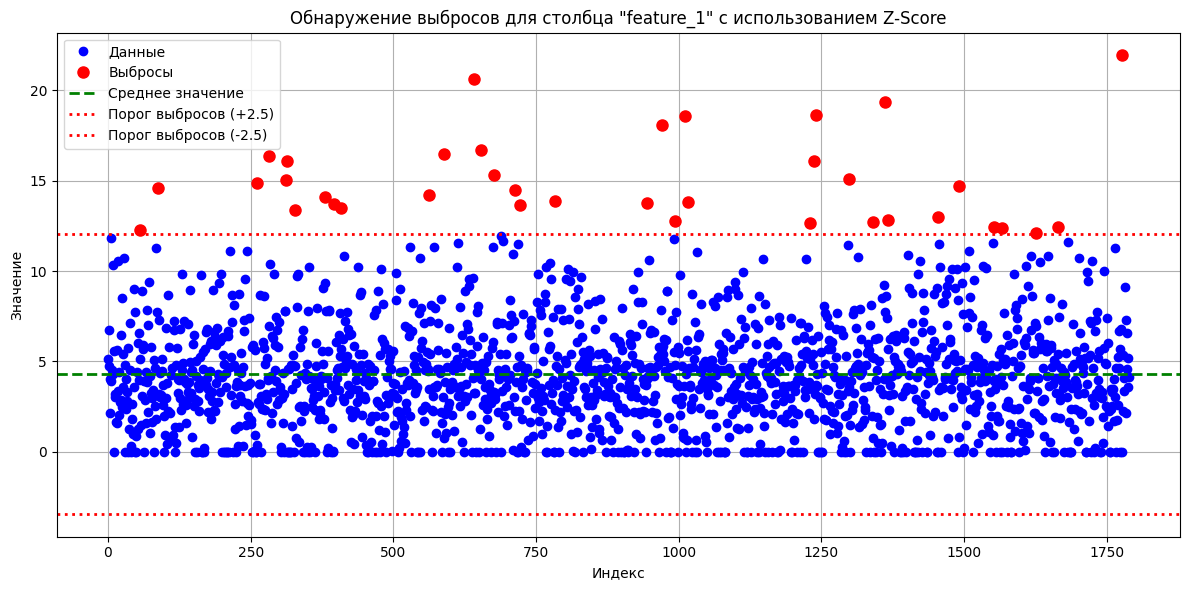

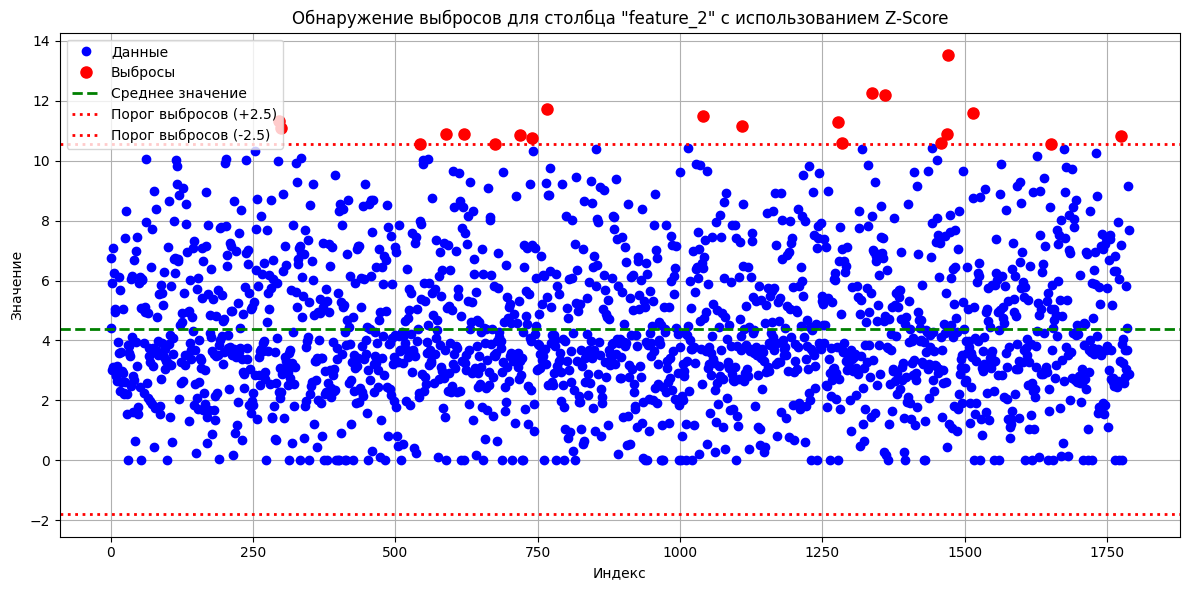

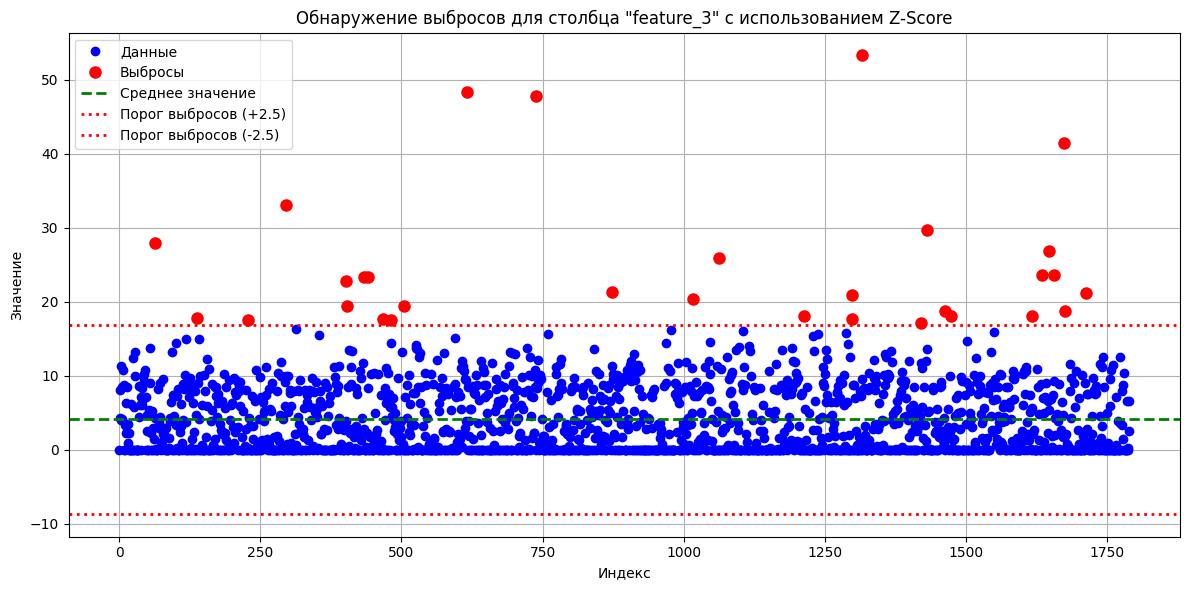

Найденные выбросы по столбцам:
  Столбец 'feature_1': [12.289349 14.57336  14.863064 16.353773 15.035807 16.097567 13.379959
 14.114307 13.69429  13.480173 14.219101 16.45669  20.603262 16.723839
 15.33831  14.512363 13.667625 13.896149 13.765877 18.079502 12.750038
 18.579988 13.795662 12.684969 16.081638 18.614388 15.114931 12.695423
 19.373442 12.798513 12.978073 14.731461 12.444765 12.367979 12.092496
 12.415199 21.930273]
  Столбец 'feature_2': [11.313551 11.082773 10.557116 10.894499 10.882362 10.553433 10.852581
 10.773773 11.739332 11.479019 11.1726   11.300719 10.607569 12.261364
 12.194197 10.600029 10.903481 13.51518  11.583777 10.563548 10.816357]
  Столбец 'feature_3': [27.97464  17.74968  17.58406  33.011486 22.825874 19.47725  23.312574
 23.391539 17.680254 17.540873 19.361132 48.335686 47.781387 21.35701
 20.43073  25.896704 18.088425 17.639776 20.883327 53.28715  17.098536
 29.646175 18.733507 18.053995 18.108582 23.620525 26.893702 23.541265
 41.47283  18.731802 21.13

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def detect_outliers_zscore(data, threshold=3, show_plot=True):
    """
    Обнаруживает выбросы в данных с использованием Z-оценок.
    """

    # Преобразование в numpy array или обработка pandas Series/DataFrame
    if isinstance(data, pd.DataFrame):
        outliers_all_columns = {}  # Словарь для хранения выбросов по столбцам
        for column in data.columns:
            column_data = data[column].copy()  # Создаем копию, чтобы не менять исходный DataFrame напрямую
            # Обработка NaN для каждого столбца
            mean = np.nanmean(column_data)
            std_dev = np.nanstd(column_data)
            if std_dev == 0: # Обработка случая нулевого стандартного отклонения
                z_scores = np.zeros(len(column_data))
            else:
                z_scores = (column_data - mean) / std_dev
            outliers_indices = np.where(np.abs(z_scores) > threshold)[0] # берем только индексы
            outliers_values = column_data.iloc[outliers_indices] # Используем .iloc для извлечения значений по индексам
            outliers_all_columns[column] = outliers_values # Сохраняем выбросы для каждого столбца

            if show_plot:
                plt.figure(figsize=(12, 6))  # Увеличиваем размер графика
                plt.plot(column_data.index, column_data, 'bo', label='Данные')  # Используем index для правильного отображения
                plt.plot(column_data.index[outliers_indices], outliers_values, 'ro', label='Выбросы', markersize=8)
                plt.axhline(mean, color='g', linestyle='dashed', linewidth=2, label='Среднее значение')
                plt.axhline(mean + threshold * std_dev, color='r', linestyle='dotted', linewidth=2, label=f'Порог выбросов (+{threshold})')
                plt.axhline(mean - threshold * std_dev, color='r', linestyle='dotted', linewidth=2, label=f'Порог выбросов (-{threshold})')
                plt.title(f'Обнаружение выбросов для столбца "{column}" с использованием Z-Score')
                plt.xlabel('Индекс')
                plt.ylabel('Значение')
                plt.legend()
                plt.grid(True)
                plt.tight_layout() # Улучшаем отображение, чтобы надписи не накладывались
                plt.show()

        print("Найденные выбросы по столбцам:")
        for column, outliers in outliers_all_columns.items():
            print(f"  Столбец '{column}': {outliers.values if isinstance(outliers,pd.Series) else outliers}")  # Выводим значения выбросов
        return outliers_all_columns  # Возвращаем словарь с выбросами по столбцам

    elif isinstance(data, (pd.Series, np.ndarray, list)):
        # Обработка Series, numpy array и list
        data = np.array(data)  # Преобразуем в numpy array для единообразия

        # Вычисление Z-оценок
        mean = np.nanmean(data)
        std_dev = np.nanstd(data)
        if std_dev == 0:  # Обработка случая нулевого стандартного отклонения
            z_scores = np.zeros(len(data))
        else:
            z_scores = (data - mean) / std_dev

        # Поиск выбросов
        outliers_indices = np.where(np.abs(z_scores) > threshold)[0] # Исправлено: берем только индексы
        outliers_values = data[outliers_indices]

        if show_plot:
            plt.figure(figsize=(10, 6))
            plt.plot(range(len(data)), data, 'bo', label='Данные') # Исправлено: используем range для индексов
            plt.plot(outliers_indices, outliers_values, 'ro', label='Выбросы', markersize=8) # Исправлено: используем только индексы
            plt.axhline(mean, color='g', linestyle='dashed', linewidth=2, label='Среднее значение')
            plt.axhline(mean + threshold * std_dev, color='r', linestyle='dotted', linewidth=2, label='Порог выбросов')
            plt.axhline(mean - threshold * std_dev, color='r', linestyle='dotted', linewidth=2)
            plt.title('Обнаружение выбросов с использованием Z-Score')
            plt.xlabel('Индекс')
            plt.ylabel('Значение')
            plt.legend()
            plt.grid(True)
            plt.show()

        print("Найденные выбросы:", outliers_values)
        return outliers_values

    else:
        raise ValueError("Неподдерживаемый тип входных данных.  Допустимы: numpy array, list, pandas Series, pandas DataFrame.")


data = pd.DataFrame(X_encoded, columns=['feature_1', 'feature_2', 'feature_3']) 
outliers = detect_outliers_zscore(data, threshold=2.5)

In [40]:
print_table_data_best_metric()
analyze_table_data_best_metric()

----------------------------------------------------------------------------------------------------------------
| Метод                            | Silhouette (n, value)    | Davies-Bouldin (n, value)| Calinski-Harabasz (n, value)|
----------------------------------------------------------------------------------------------------------------
| K-Means 3                        | (6, 0.3464)              | (8, 0.9579)              | (4, 699.2771)            | 
| Mean Shift Clustering            | (7, 0.1633)              | (7, 0.7294)              | (7, 65.0604)             | 
| Affinity Propagation Clustering  | (62, 0.2753)             | (62, 0.9846)             | (62, 485.1256)           | 
| K-Means 3 PCA                    | (2, 0.5140)<-best        | (9, 0.7260)<-best        | (2, 1623.9662)<-best     | 
| SpectralClustering               | (4, 0.2322)              | (9, 1.0106)              | (4, 534.3329)            | 
| AgglomerativeClustering          | (3, 0.2659)          

In [54]:
'''
Я выбираю K-Means 3 PCA:
1. K-Means 3 PCA показывает лучшие результаты по трем метрикам.
    Это говорит о более надежном и стабильном разделении кластеров.
2. K-Means - это простой и понятный алгоритм. PCA (Principal Component Analysis) используется для снижения размерности данных,
    что может упростить визуализацию и анализ кластеров.
3. K-Means 3 PCA дает всего 2 кластера -  простое разделение данных на две группы.
'''

'\nЯ выбираю K-Means 3 PCA:\n1. K-Means 3 PCA показывает лучшие результаты по трем метрикам.\n    Это говорит о более надежном и стабильном разделении кластеров.\n2. K-Means - это простой и понятный алгоритм. PCA (Principal Component Analysis) используется для снижения размерности данных,\n    что может упростить визуализацию и анализ кластеров.\n3. K-Means 3 PCA дает всего 2 кластера -  простое разделение данных на две группы.\n'

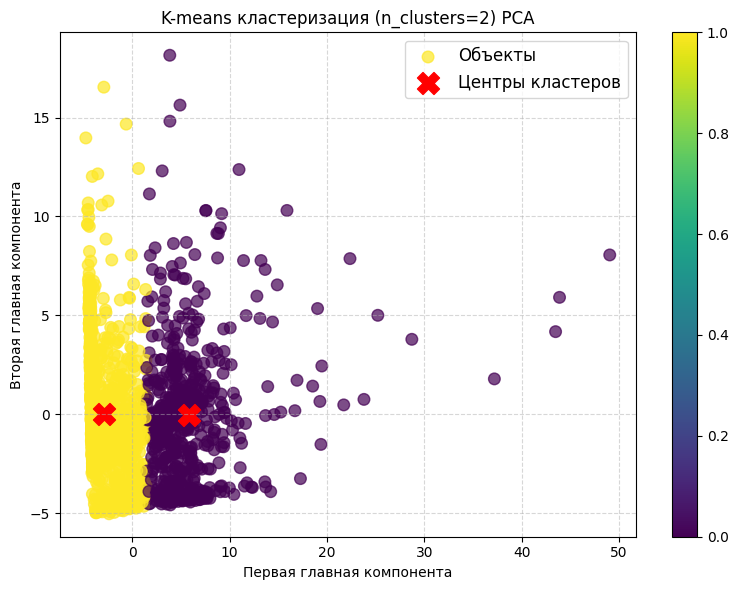

Количество кластеров: 2
Силуэтная оценка: 0.51
Индекс Дэвиса-Болдуина: 0.80
Индекс Калински-Харабаса: 1623.97
Инерция: 33490.69
--------------------------------------------------------------------------------


In [42]:
# Кластеризация по методу K-Means для 3 признаков c PCA
# 2 кластера

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import pandas as pd 

# Функция для оценки кластеризации и визуализации
def evaluate_clustering(X, n_clusters, show_graph=False, print_score=False):
    # Вычисление метрик
    kmeans, labels, inertia = calculate_kmeans(X, n_clusters)
    silhouette_avg, davies_bouldin, calinski_harabasz = calculate_quality_metrics(X, labels)

    if show_graph:
        centers = kmeans.cluster_centers_
        title = f'K-means кластеризация (n_clusters={n_clusters}) PCA';
        visualize_clusters_with_centers(X, labels, centers, title)

    if print_score:
        print_scores(n_clusters, silhouette_avg, davies_bouldin, calinski_harabasz, inertia)

    return {
        'silhouette': silhouette_avg,
        'davies_bouldin': davies_bouldin,
        'inertia': inertia,
        'calinski_harabasz': calinski_harabasz
    }


X_pca, pca = reduce_dimensions(features_df)
best_method_silhouette, best_n_clusters_silhouette, best_value_silhouette = find_best_method('silhouette', 'max')
n_clusters=best_n_clusters_silhouette
best_metric_result = evaluate_clustering(X_pca, n_clusters, show_graph=True, print_score=True)

In [43]:
X_pca, pca = reduce_dimensions(features_df, 2)
kmeans, labels, inertia = calculate_kmeans(X_pca, n_clusters)

features_df.info()
print_splitter()
print(repr(X_pca))
print_splitter()
print("labels", repr(labels))
print(len(labels))
print_splitter()

# 4. Сохраняем извлеченные признаки
X2 = features_df[['feature_1', 'feature_2', 'feature_3']]

# Теперь features_df содержит новые извлеченные признаки
print(X2.info())

'''
1790 записей, потому что это размер тестовой выборки, которая использовалась для получения извлеченных признаков.
Разделили исходные данные на обучающую и тестовую выборки, а затем применили обученный автоэнкодер к тестовой выборке,
чтобы получить извлеченные признаки.
'''

X2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1790 non-null   float32
 1   feature_2  1790 non-null   float32
 2   feature_3  1790 non-null   float32
dtypes: float32(3)
memory usage: 21.1 KB
--------------------------------------------------------------------------------
array([[-4.0111985 ,  0.39838457],
       [ 0.16917562,  2.4170127 ],
       [ 4.0786495 ,  0.4656515 ],
       ...,
       [-3.6394517 ,  0.24904919],
       [ 2.6917272 , -0.9652605 ],
       [-1.5678725 , -0.10137534]], dtype=float32)
--------------------------------------------------------------------------------
labels array([1, 1, 0, ..., 1, 0, 1])
1790
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 3 columns):
 #   Column     Non-Nul

feature_1    feature_2    feature_3
count  1790.000000  1790.000000  1790.000000
mean      4.300406     4.379416     4.082715
std       3.096166     2.466978     5.105786
min       0.000000     0.000000     0.000000
25%       2.269718     2.744716     0.000000
50%       3.996010     3.889622     2.268119
75%       5.765630     6.011620     7.526884
max      21.930273    13.515180    53.287151

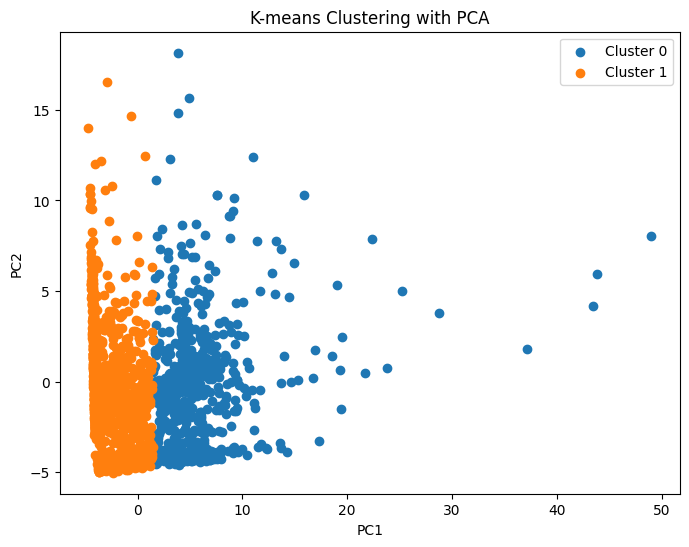

In [44]:
# labels - это массив, содержащий номер кластера для каждой точки
X_pca, pca = reduce_dimensions(features_df, 2)
kmeans, labels, inertia = calculate_kmeans(X_pca, n_clusters)
n_clusters = 2

# Визуализация
plt.figure(figsize=(8, 6))
for i in range(n_clusters):  # n_clusters - количество кластеров, которые вы использовали
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering with PCA')
plt.legend()
plt.show()

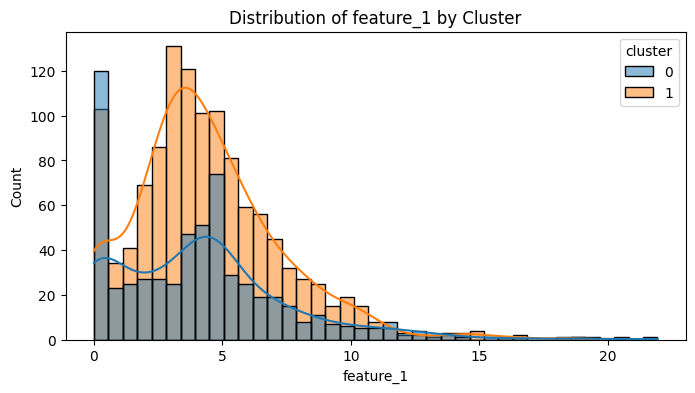

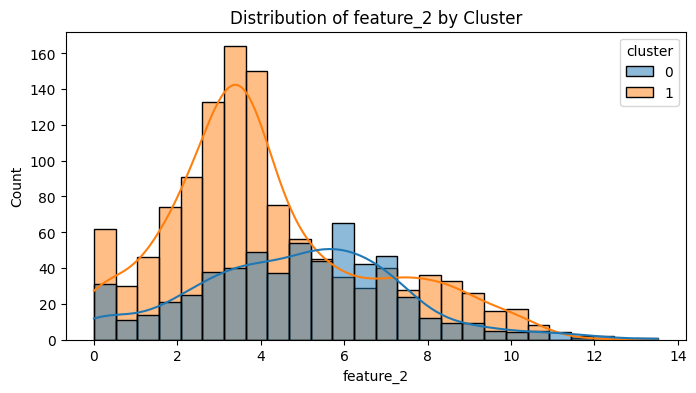

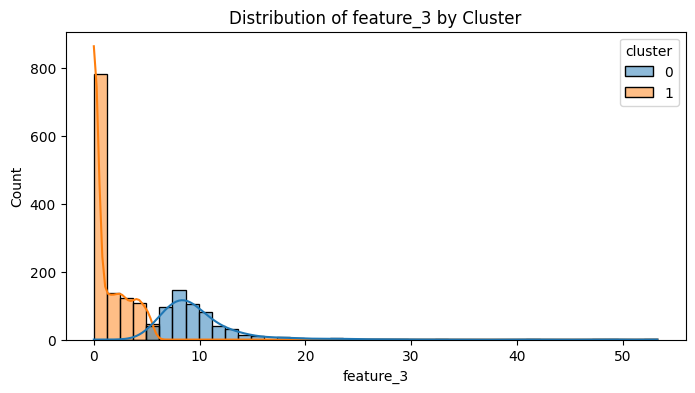

In [45]:
# Визуализация распределений признаков
import pandas as pd

# Создаем DataFrame для удобства
features_df_for_analysis = features_df.copy() 
features_df_for_analysis['cluster'] = labels  # Добавляем столбец с номерами кластеров

# Визуализация распределений признаков для каждого кластера
for column in features_df_for_analysis.columns[:-1]:  # Исключаем столбец 'cluster'
    plt.figure(figsize=(8, 4))
    sns.histplot(data=features_df_for_analysis, x=column, hue='cluster', kde=True)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

           feature_1  feature_2  feature_3
feature_1   1.000000  -0.050588  -0.037212
feature_2  -0.050588   1.000000   0.062368
feature_3  -0.037212   0.062368   1.000000


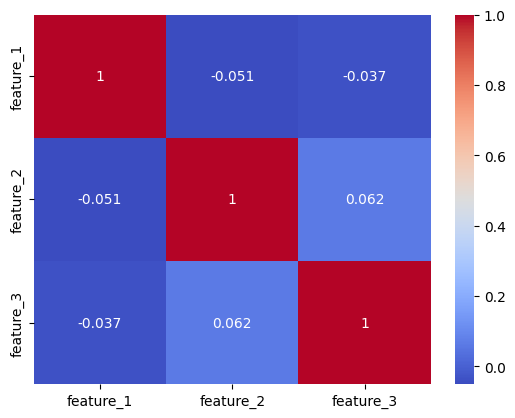

In [46]:
# Анализ корреляции
correlation_matrix = features_df.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [47]:
'''
реализуем стекинг(Stacking) - это  метод ансамблирования, который объединяет предсказания нескольких базовых моделей (классификаторов или регрессоров) 
для получения более точного и устойчивого прогноза. Он основан на идее обучения "мета-модели" (или "стейкера"), которая учится объединять прогнозы 
базовых моделей.

1. Разметили данные с помощью K-means. К набору признаков дописали метку класса(кластера). Метка класса - это целевая переменная.
Необходимо:
2. Выбрать базовые модели: Например, логистическую регрессию, случайный лес, SVM и т.д.
3. Определить мета-модель
4. Создать стекинг классификатор
5. Разделить данные на обучающий и тестовый наборы.
6. Обучить базовые модели на обучающем наборе.
7. Сделать предсказания базовыми моделями на тестовом наборе.
8. Оценить модель
9. Rросс-валидация
'''

'\nреализуем стекинг(Stacking) - это  метод ансамблирования, который объединяет предсказания нескольких базовых моделей (классификаторов или регрессоров) \nдля получения более точного и устойчивого прогноза. Он основан на идее обучения "мета-модели" (или "стейкера"), которая учится объединять прогнозы \nбазовых моделей.\n\n1. Разметили данные с помощью K-means. К набору признаков дописали метку класса(кластера). Метка класса - это целевая переменная.\nНеобходимо:\n2. Выбрать базовые модели: Например, логистическую регрессию, случайный лес, SVM и т.д.\n3. Определить мета-модель\n4. Создать стекинг классификатор\n5. Разделить данные на обучающий и тестовый наборы.\n6. Обучить базовые модели на обучающем наборе.\n7. Сделать предсказания базовыми моделями на тестовом наборе.\n8. Оценить модель\n9. Rросс-валидация\n'

In [48]:
# Создаем DataFrame для удобства
features_df_for_analysis = features_df.copy() 
features_df_for_analysis['cluster'] = labels  # Добавляем столбец с номерами кластеров

# 2. Выбраем базовые модели для стекинга
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# 3. Определяем мета-модель
meta_model = LogisticRegression()

# 4. Создаем стекинг классификатор
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)  
# cv=5 - это кросс-валидация для базовых моделей
# Каждая базовая модель обучается на 4 фолдах и делает предсказания на оставшемся фолде.
# Это повторяется для каждого фолда, так что в итоге есть предсказания каждой базовой модели для всех данных.

In [49]:
from sklearn.model_selection import train_test_split

# 5. Разделяем данные на обучающий и тестовый наборы
X2 = features_df_for_analysis.drop('cluster', axis=1) 
y = features_df_for_analysis['cluster']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Масштабируем данные для стекинга
scaler_stacking = StandardScaler()
X2_train_scaled = scaler_stacking.fit_transform(X2_train)
X2_test_scaled = scaler_stacking.transform(X2_test)

print("features_df_for_analysis")
features_df_for_analysis.info()
print_splitter()

print("X2_train")
X2_train.info()
print_splitter()

print("X2_test")
X2_test.info()

features_df_for_analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1790 non-null   float32
 1   feature_2  1790 non-null   float32
 2   feature_3  1790 non-null   float32
 3   cluster    1790 non-null   int32  
dtypes: float32(3), int32(1)
memory usage: 28.1 KB
--------------------------------------------------------------------------------
X2_train
<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 1378 to 1126
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1432 non-null   float32
 1   feature_2  1432 non-null   float32
 2   feature_3  1432 non-null   float32
dtypes: float32(3)
memory usage: 28.0 KB
--------------------------------------------------------------------------------
X2_test
<class 'pandas.core.frame.DataFrame'>
Index: 358 entri

In [50]:
# 6. Обучаем стекинг классификатор. Обучаем базовые модели на обучающем наборе.
stacking_model.fit(X2_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# 7. Делаем предсказания к какому кластеру(классу) относятся данные
y_pred = stacking_model.predict(X2_test)
# print(y_pred)

In [52]:
# 8. Оцениваем модель
from sklearn.metrics import accuracy_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of stacking model: {accuracy:.2f}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score of stacking model: {f1:.2f}')

print(classification_report(y_test, y_pred))

# 9. Кросс-валидация
cv_scores = cross_val_score(stacking_model, X2, y, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy of stacking model: 0.68
F1-score of stacking model: 0.69
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       114
           1       1.00      0.54      0.70       244

    accuracy                           0.68       358
   macro avg       0.75      0.77      0.68       358
weighted avg       0.84      0.68      0.69       358

Cross-validation accuracy scores: [0.99441341 0.9972067  0.99162011 0.99441341 0.99162011]
Mean cross-validation accuracy: 0.99
